# Лабораторная работа №2. Задача классификации

**Тема:** *Анализ и сравнение разных классификаторов*

**Цели:**

- *Научиться обрабатывать датасет*
- *Реализовать разные классификаторы*
- *Понять, как интерпретировать важность признаков (feature importance)*
- *Понять, как увеличивать кол-во признаков (feature tuning)*


**Модели:**

- *Линейная регрессия*
- *Метод опорных векторов (SVM)*
- *$K$ - ближайших соседей*
- *Дерево решений*
- *Случайный лес*
- *Градиентный бустинг*


#### 👋🏻 ЧТО НУЖНО СДЕЛАТЬ СТУДЕНТАМ ???

1. Загрузить датасет, который был в `lr_1.ipynb`
2. Свести его к задаче классификации (бинарной или многоклассовой).
3. Обработать датасет
4. Обучить модели
5. (команда) Реализовать свою логистическую регрессию. Настроить параметр вероятности ответа как if $ y_{pred} < 0,5$ then $0$ else $1$ чтобы получилась бинарная классификация
6. **(необезательно, но можно получить плюсик от меня)** С помощью `optuna` реализовать подгонку гиперпараметров для `CatBoost`.
7. Ответить на вопросы
8. Придумать какую-то уникальность работы, то, что будет вас отличать от других, и это вам надо будет мне "продать".
8. Составить `презентацию` о проделанной работе (10-15 слайдов), а именно: нужно выбрать одну модель, и для нее описать подготовку датасета, распределение данных, показать какие метрики выдает модель при разных настройках, побольше описательных графиков. Вам нужно будет мне "продавть ваше решение".
9. Записать `видео вашей защиты на 5 минут`, где вы рассказываете только о вашей фиче.

#### Форматы сдачи

1. Один студент, делает только стандартные реализации. Упрощенная форма сдачи.
2. Команда из 2х людей. Нужно обязательно сделать Логистическую регрессию и сравнить ее с лучшей стандартной моделью.
3. Команда из 3х людей. Сделать то, что и в команде из 2х человек + обязательно реализация подбора гиперпараметров, с помощью Optuna.

#### Как получить дополнительные плюсики

Я буду оценивать вашу работу комплексно, т.к. нас `55 человек`, то:
1. Самую лучшую работу, сданную на 5, буду расценивать за 6 плюсиков. Если вы в соло делаете, это большое преимущество, 6 баллов ваши, если командой, то делится на команду.
2. 5 человек получат по 2 плюсика
3. 10 человек получат по 1 плюсику

#### Дедлайны

- До 24.10.25 argmax(оценки) = 5 (есть возможность на +)
- До 31.10.25 argmax(оценки) = 4 (нет возможности на +)
- До 07.11.25 argmax(оценки) = 3 (нет возможности на +)

## 1. Введение

Цель: загрузить датасет, сделать описание и сформулировать задачу

# Проект: Динамическая система оценки риска диабета с персонализированными рекомендациями

## Описание датасета
**Pima Indians Diabetes Database** - медицинский датасет, содержащий диагностические измерения для предсказания наличия диабета у пациентов. Дадасет включает 768 наблюдений с 8 медицинскими признаками и бинарной целевой переменной.

##  Признаки датасета:
- **Pregnancies** - количество беременностей
- **Glucose** - уровень глюкозы в плазме
- **BloodPressure** - диастолическое артериальное давление (мм Hg)
- **SkinThickness** - толщина кожной складки трицепса (мм)
- **Insulin** - уровень инсулина в сыворотке крови (mu U/ml)
- **BMI** - индекс массы тела (вес в кг/(рост в м)^2)
- **DiabetesPedigreeFunction** - функция наследственной предрасположенности к диабету
- **Age** - возраст (лет)
- **Outcome** - целевая переменная (0 - нет диабета, 1 - есть диабет)

##  Постановка задачи

###  Основная задача:
Разработать интеллектуальную систему для **оценки индивидуального риска развития диабета** с предоставлением **персонализированных рекомендаций** по снижению риска.


###  Технические подзадачи:

#### 1. **Предобработка данных**
- Анализ и обработка аномальных значений (нули в медицинских показателях)
- Feature engineering для улучшения предсказательной способности
- Создание производных признаков

#### 2. **Разработка ML-моделей**
- Ансамбль моделей для надежной оценки вероятности
- Калибровка вероятностей для клинической достоверности
- Оптимизация порогов классификации под медицинские требования

#### 3. **Rule-based система интерпретации**
- Создание интеллектуальной системы генерации рекомендаций
- Разработка градаций риска (низкий/средний/высокий/критический)
- Формирование персонализированных советов по каждому фактору риска



### 1.0. Импортируем библиотеки и зафиксируем случайность

In [1]:
# Main libs for data
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix,
    roc_auc_score, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# Project Settings
RANDOM_STATE = 42

In [3]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\51126\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### 1.1. Загрузка датасета

In [4]:
# mount gDrive
df = pd.read_csv('diabetes.csv')

In [5]:
# Посмотрим на данные
print("Форма датасета:", df.shape)
display(df.head()) 

Форма датасета: (768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
df.info()                 # показывает типы и пропуски
print("\nРаспределение целевой переменной:")
print(df['Outcome'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Распределение целевой переменной:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


| Название (англ.)           | Перевод (рус.)               |
| -------------------------- | ---------------------------- |
| Pregnancies                | количество беременностей     |
| Glucose                    | уровень глюкозы в плазме     |
| BloodPressure              | артериальное давление        |
| SkinThickness              | толщина кожной складки       |
| Insulin                    | уровень инсулина             |
| BMI                        | индекс массы тела (ИМТ)      |
| DiabetesPedigreeFunction   | функция наследственности диабета |
| Age                        | возраст                      |
| Outcome                    | результат (наличие диабета)  |


### 1.2. Постановка задачи

**Целевая задача:** классическая задача медицинской диагностики диабета. Мы можем решить её как:

- **Бинарная классификация** (предсказание наличия или отсутствия диабета)
  - Класс 0: нет диабета
  - Класс 1: есть диабет

**Альтернативные подходы:**
- **Оценка уровня риска** (низкий/средний/высокий риск развития диабета)
- **Прогнозирование вероятности** развития диабета на основе медицинских показателей
- **Ранняя диагностика** преддиабетического состояния

**Основная цель:** построение модели, способной с высокой точностью идентифицировать пациентов с риском развития диабета на основе диагностических измерений.

## 2. Подготовка данных

### 2.0. Предварительный анализ данных

Типы признаков

In [7]:
# Типы данных и уникальные значения целевой переменной
print(f'Типы признаков:\n{df.dtypes}')
print(f"\nOutcome: {df['Outcome'].dtype}, уникальные значения: {sorted(df['Outcome'].unique())}")

Типы признаков:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Outcome: int64, уникальные значения: [np.int64(0), np.int64(1)]


В датасете только два признака имеют тип `float64`, остальные переменные имеют тип `int64`.

In [8]:
display(df.describe().T.round(2))  # округлим до 2 знаков

count    mean     std    min    25%     50%     75%  \
Pregnancies               768.0    3.85    3.37   0.00   1.00    3.00    6.00   
Glucose                   768.0  120.89   31.97   0.00  99.00  117.00  140.25   
BloodPressure             768.0   69.11   19.36   0.00  62.00   72.00   80.00   
SkinThickness             768.0   20.54   15.95   0.00   0.00   23.00   32.00   
Insulin                   768.0   79.80  115.24   0.00   0.00   30.50  127.25   
BMI                       768.0   31.99    7.88   0.00  27.30   32.00   36.60   
DiabetesPedigreeFunction  768.0    0.47    0.33   0.08   0.24    0.37    0.63   
Age                       768.0   33.24   11.76  21.00  24.00   29.00   41.00   
Outcome                   768.0    0.35    0.48   0.00   0.00    0.00    1.00   

                             max  
Pregnancies                17.00  
Glucose                   199.00  
BloodPressure             122.00  
SkinThickness              99.00  
Insulin                   846.00  
BMI                        67.10  
DiabetesPedigreeFunction    2.42  
Age                        81.00  
Outcome                     1.00

In [9]:
# Анализ распределения и выбросов
print('Анализ распределения признаков:')

# Признаки с правым скосом (mean > median)
print('\nПризнаки с ПРАВЫМ СКОСОМ (mean > median):')
right_skewed = []
for col in df.columns[:-1]:  # исключаем Outcome
    mean_val = df[col].mean()
    median_val = df[col].median()
    if mean_val > median_val:
        right_skewed.append(col)
        print(f'  → {col}: mean = {mean_val:.2f} > median = {median_val:.2f}')

# Признаки с выбросами (по методу IQR)
print('\nПризнаки с ВЫБРОСАМИ (по методу IQR):')
outlier_features = []
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_count = ((df[col] < lower) | (df[col] > upper)).sum()
    if outliers_count > 0:
        outlier_features.append(col)
        print(f'  → {col}: {outliers_count} выбросов')

# КРИТИЧЕСКИЕ АНОМАЛИИ — считаем динамически!
print('\nКРИТИЧЕСКИЕ АНОМАЛИИ (автоматически):')
if df['Pregnancies'].max() > 15:
    print(f'  → Pregnancies: максимум = {df["Pregnancies"].max()} (очень подозрительно)')

if df['Insulin'].std() > 100:
    print(f'  → Insulin: огромный разброс (std = {df["Insulin"].std():.1f})')

if df['SkinThickness'].max() >= 90:
    print(f'  → SkinThickness: максимум = {df["SkinThickness"].max()} мм (практически нереально)')

# Дополнительно: нули в медицинских столбцах — это тоже аномалии!
zero_anomalies = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print(f'\nНули в медицинских показателях (это аномалии!):')
for col in zero_anomalies:
    zeros = (df[col] == 0).sum()
    if zeros > 0:
        print(f'  → {col}: {zeros} нулей → нужно заменить!')

Анализ распределения признаков:

Признаки с ПРАВЫМ СКОСОМ (mean > median):
  → Pregnancies: mean = 3.85 > median = 3.00
  → Glucose: mean = 120.89 > median = 117.00
  → Insulin: mean = 79.80 > median = 30.50
  → DiabetesPedigreeFunction: mean = 0.47 > median = 0.37
  → Age: mean = 33.24 > median = 29.00

Признаки с ВЫБРОСАМИ (по методу IQR):
  → Pregnancies: 4 выбросов
  → Glucose: 5 выбросов
  → BloodPressure: 45 выбросов
  → SkinThickness: 1 выбросов
  → Insulin: 34 выбросов
  → BMI: 19 выбросов
  → DiabetesPedigreeFunction: 29 выбросов
  → Age: 9 выбросов

КРИТИЧЕСКИЕ АНОМАЛИИ (автоматически):
  → Pregnancies: максимум = 17 (очень подозрительно)
  → Insulin: огромный разброс (std = 115.2)
  → SkinThickness: максимум = 99 мм (практически нереально)

Нули в медицинских показателях (это аномалии!):
  → Glucose: 5 нулей → нужно заменить!
  → BloodPressure: 35 нулей → нужно заменить!
  → SkinThickness: 227 нулей → нужно заменить!
  → Insulin: 374 нулей → нужно заменить!
  → BMI: 11 нулей

In [10]:
print("="*60)
print("ПРЕДОБРАБОТКА ДАННЫХ")
print("="*60)

# Создаём чистую копию
df_clean = df.copy()

# 1. Заменяем нули в медицинских столбцах на медиану (это стандарт для Pima Indians Diabetes)
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    median_val = df_clean[df_clean[col] != 0][col].median()  # медиана только по ненулевым
    zeros_count = (df_clean[col] == 0).sum()
    df_clean[col] = df_clean[col].replace(0, median_val)
    print(f"→ {col}: заменено {zeros_count} нулей на медиану = {median_val:.2f}")

# 2. Дополнительно: ограничим совсем нереалистичные значения (опционально, но красиво)
df_clean['SkinThickness'] = df_clean['SkinThickness'].clip(upper=60)   # >60 мм — почти не бывает
df_clean['Insulin'] = df_clean['Insulin'].clip(upper=600)              # >600 — редкость
df_clean['Pregnancies'] = df_clean['Pregnancies'].clip(upper=15)       # >15 — почти нереально

print(f"\nПредобработка завершена! Размер датасета: {df_clean.shape}")
print("Теперь данные готовы к обучению моделей")
print("="*60)

ПРЕДОБРАБОТКА ДАННЫХ
→ Glucose: заменено 5 нулей на медиану = 117.00
→ BloodPressure: заменено 35 нулей на медиану = 72.00
→ SkinThickness: заменено 227 нулей на медиану = 29.00
→ Insulin: заменено 374 нулей на медиану = 125.00
→ BMI: заменено 11 нулей на медиану = 32.30

Предобработка завершена! Размер датасета: (768, 9)
Теперь данные готовы к обучению моделей


In [11]:
candidates = ['df_fe', 'df_final_clean', 'df_no_outliers', 'df_clean', 'df_processed', 'df']

df_source = None
source_name = ""

for name in candidates:
    if name in globals() and isinstance(globals()[name], pd.DataFrame):
        if 'Outcome' in globals()[name].columns:
            df_source = globals()[name]
            source_name = name
            break

if df_source is None:
    print("Не найден готовый датафрейм → создаём с нуля (с заменой нулей)")
    df_raw = pd.read_csv('diabetes.csv')
    
    cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    df_cleaned = df_raw.copy()
    for col in cols_with_zeros:
        median_val = df_cleaned[df_cleaned[col] != 0][col].median()
        df_cleaned[col] = df_cleaned[col].replace(0, median_val)
    
    df_source = df_cleaned
    source_name = "восстановленный df_clean"
else:
    print(f"Найден датафрейм: {source_name} → используем его!")
print(f"\nОбработка выбросов в {source_name}...")

df_no_outliers = df_source.copy()
df_no_outliers['Insulin'] = df_no_outliers['Insulin'].clip(upper=600)
df_no_outliers['SkinThickness'] = df_no_outliers['SkinThickness'].clip(upper=60)
df_no_outliers['Pregnancies'] = df_no_outliers['Pregnancies'].clip(upper=15)
df_no_outliers['BMI'] = df_no_outliers['BMI'].clip(upper=50)

print(f"ГОТОВО! df_no_outliers создан и готов к использованию")
print(f"Размер: {df_no_outliers.shape[0]} строк × {df_no_outliers.shape[1]} столбцов")
print(f"Пропусков: {df_no_outliers.isnull().sum().sum()}, inf: {np.isinf(df_no_outliers.select_dtypes(include=np.number)).sum().sum()}")

display(df_no_outliers.head(3))

Найден датафрейм: df_clean → используем его!

Обработка выбросов в df_clean...
ГОТОВО! df_no_outliers создан и готов к использованию
Размер: 768 строк × 9 столбцов
Пропусков: 0, inf: 0


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

### 2.1. Feauture Engineering

In [12]:
# Работаем с чистыми данными
df_fe = df_clean.copy()

Создаём соотношения:

In [13]:
df_fe['Glucose_BMI_Ratio'] = df_fe['Glucose'] / (df_fe['BMI'] + 1e-8)
df_fe['Insulin_Glucose_Ratio'] = df_fe['Insulin'] / (df_fe['Glucose'] + 1)
df_fe['BP_Age_Ratio'] = df_fe['BloodPressure'] / (df_fe['Age'] + 1)

### Добавим формулу, для нелинейного взаимодействия:

Формула Threshold_Genetic_Risk моделирует нелинейное взаимодействие:

age_threshold = 35 - критический возраст, после которого 
наследственный риск начинает усиливаться

(DiabetesPedigreeFunction) * (Age - age_threshold)^1.2:
- Наследственность умножается на "избыток возраста" после порога
- Степень 1.2 создает нелинейное усиление риска с годами
- Если возраст ≤ 35, риск = 0 (пороговый эффект)

Клинический смысл: после 35 лет генетическая предрасположенность 
начинает экспоненциально влиять на развитие диабета

In [14]:
# 2. Квадратичные + кубические
df_fe['Age_sq'] = df_fe['Age'] ** 2
df_fe['Age_cubed'] = df_fe['Age'] ** 3
df_fe['BMI_sq'] = df_fe['BMI'] ** 2
df_fe['Glucose_sq'] = df_fe['Glucose'] ** 2
df_fe['DPF_sq'] = df_fe['DiabetesPedigreeFunction'] ** 2

# 3. Логарифмы
df_fe['log_Insulin'] = np.log1p(df_fe['Insulin'])
df_fe['log_Glucose'] = np.log1p(df_fe['Glucose'])

In [15]:
# 4. Взаимодействия
df_fe['Glucose_x_BMI'] = df_fe['Glucose'] * df_fe['BMI']
df_fe['Glucose_x_Insulin'] = df_fe['Glucose'] * df_fe['Insulin']
df_fe['BMI_x_Age'] = df_fe['BMI'] * df_fe['Age']
df_fe['Pedigree_x_Age'] = df_fe['DiabetesPedigreeFunction'] * df_fe['Age']

# 5.Нелинейный генетический риск
df_fe['Threshold_Genetic_Risk'] = df_fe['DiabetesPedigreeFunction'] * np.where(
    df_fe['Age'] > 35,
    (df_fe['Age'] - 35) ** 1.5,
    0
)

# 6. Бинарные флаги высокого риска
df_fe['High_Glucose'] = (df_fe['Glucose'] > 140).astype(int)
df_fe['Obese'] = (df_fe['BMI'] > 30).astype(int)
df_fe['Senior'] = (df_fe['Age'] > 50).astype(int)

# --- ПРОВЕРКА: УБЕДИМСЯ, ЧТО ВСЁ ЧИСТО! ---
print("Проверка на inf и NaN:")
print("Есть inf?:", np.isinf(df_fe.select_dtypes(include=np.number)).sum().sum())
print("Есть NaN?:", df_fe.isnull().sum().sum())

# Если всё 0 — значит ВСЁ ИДЕАЛЬНО!
if np.isinf(df_fe.select_dtypes(include=np.number)).sum().sum() == 0 and df_fe.isnull().sum().sum() == 0:
    print("ВСЁ ЧИСТО! Можно обучать модели на максимум!")
else:
    print("Где-то ещё есть мусор — пиши, найду за секунду")

print(f"\nИтого признаков: {df_fe.shape[1]} (из них новых: {df_fe.shape[1] - 9})")

Проверка на inf и NaN:
Есть inf?: 0
Есть NaN?: 0
ВСЁ ЧИСТО! Можно обучать модели на максимум!

Итого признаков: 27 (из них новых: 18)


Итого у нас получилось (33 фич)

In [16]:
df_fe.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_BMI_Ratio  ...  \
0                     0.627   50        1           4.404762  ...   
1                     0.351   31        0           3.195489  ...   
2                     0.672   32        1           7.854077  ...   
3                     0.167   21        0           3.167260  ...   
4                     2.288   33        1           3.178654  ...   

   log_Insulin  log_Glucose  Glucose_x_BMI  Glucose_x_Insulin  BMI_x_Age  \
0     4.836282     5.003946         4972.8              18500     1680.0   
1     4.836282     4.454347         2261.0              10625      824.6   
2     4.836282     5.214936         4263.9              22875      745.6   
3     4.553877     4.499810         2500.9               8366      590.1   
4     5.129899     4.927254         5904.7              23016     1422.3   

   Pedigree_x_Age  Threshold_Genetic_Risk  High_Glucose  Obese  Senior  
0          31.350               36.425408             1      1       0  
1          10.881                0.000000             0      0       0  
2          21.504                0.000000             1      0       0  
3           3.507                0.000000             0      0       0  
4          75.504                0.000000             0      1       0  

[5 rows x 27 columns]

In [17]:
possible_dfs = ['df_fe', 'df_final_clean', 'df_outliers_clean', 'df_clean', 'df']

current_df = None
current_name = "неизвестный"

for name in possible_dfs:
    if name in globals() and isinstance(globals()[name], pd.DataFrame):
        current_df = globals()[name]
        current_name = name
        break

if current_df is not None:
    print(f"СТАТИСТИКА ТЕКУЩИХ ДАННЫХ → {current_name}")
    print(f"Размер: {current_df.shape[0]} строк × {current_df.shape[1]} столбцов")
    print(f"Пропуски: {current_df.isnull().sum().sum()}")
    print(f"inf значения: {np.isinf(current_df.select_dtypes(include=[np.number])).sum().sum()}")
    print("\n" + "="*70)
    display(current_df.describe().T.round(3))
    print("\nПервые 5 строк:")
    display(current_df.head())
else:
    print("Не найден ни один датафрейм. Загрузи данные заново:")
    df_raw = pd.read_csv('diabetes.csv')
    display(df_raw.describe().T.round(2))

СТАТИСТИКА ТЕКУЩИХ ДАННЫХ → df_fe
Размер: 768 строк × 27 столбцов
Пропуски: 0
inf значения: 0



count       mean        std       min        25%  \
Pregnancies               768.0      3.842      3.360     0.000      1.000   
Glucose                   768.0    121.656     30.438    44.000     99.750   
BloodPressure             768.0     72.387     12.097    24.000     64.000   
SkinThickness             768.0     29.053      8.480     7.000     25.000   
Insulin                   768.0    140.060     82.368    14.000    121.500   
BMI                       768.0     32.455      6.875    18.200     27.500   
DiabetesPedigreeFunction  768.0      0.472      0.331     0.078      0.244   
Age                       768.0     33.241     11.760    21.000     24.000   
Outcome                   768.0      0.349      0.477     0.000      0.000   
Glucose_BMI_Ratio         768.0      3.868      1.103     1.479      3.051   
Insulin_Glucose_Ratio     768.0      1.143      0.537     0.077      0.834   
BP_Age_Ratio              768.0      2.292      0.659     0.758      1.786   
Age_sq                    768.0   1243.079    951.415   441.000    576.000   
Age_cubed                 768.0  52333.811  63965.180  9261.000  13824.000   
BMI_sq                    768.0   1100.547    480.477   331.240    756.250   
Glucose_sq                768.0  15725.526   7979.231  1936.000   9950.250   
DPF_sq                    768.0      0.332      0.566     0.006      0.059   
log_Insulin               768.0      4.826      0.492     2.708      4.808   
log_Glucose               768.0      4.779      0.248     3.807      4.613   
Glucose_x_BMI             768.0   3996.667   1469.660  1100.000   2924.100   
Glucose_x_Insulin         768.0  18100.396  14688.594  1020.000  11000.000   
BMI_x_Age                 768.0   1080.907    437.814   382.200    744.800   
Pedigree_x_Age            768.0     15.816     12.927     1.638      7.268   
Threshold_Genetic_Risk    768.0      8.270     22.022     0.000      0.000   
High_Glucose              768.0      0.250      0.433     0.000      0.000   
Obese                     768.0      0.620      0.486     0.000      0.000   
Senior                    768.0      0.105      0.307     0.000      0.000   

                                50%        75%         max  
Pregnancies                   3.000      6.000      15.000  
Glucose                     117.000    140.250     199.000  
BloodPressure                72.000     80.000     122.000  
SkinThickness                29.000     32.000      60.000  
Insulin                     125.000    127.250     600.000  
BMI                          32.300     36.600      67.100  
DiabetesPedigreeFunction      0.372      0.626       2.420  
Age                          29.000     41.000      81.000  
Outcome                       0.000      1.000       1.000  
Glucose_BMI_Ratio             3.747      4.562       8.255  
Insulin_Glucose_Ratio         1.050      1.320       4.800  
BP_Age_Ratio                  2.277      2.750       4.364  
Age_sq                      841.000   1681.000    6561.000  
Age_cubed                 24389.000  68921.000  531441.000  
BMI_sq                     1043.290   1339.560    4502.410  
Glucose_sq                13689.000  19670.250   39601.000  
DPF_sq                        0.139      0.392       5.856  
log_Insulin                   4.836      4.854       6.399  
log_Glucose                   4.771      4.951       5.298  
Glucose_x_BMI              3750.150   4800.250   10692.000  
Glucose_x_Insulin         14625.000  19875.000  118200.000  
BMI_x_Age                   987.250   1357.200    2697.000  
Pedigree_x_Age               11.414     19.364      82.137  
Threshold_Genetic_Risk        0.000      3.803     187.252  
High_Glucose                  0.000      0.250       1.000  
Obese                         1.000      1.000       1.000  
Senior                        0.000      0.000       1.000


Первые 5 строк:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_BMI_Ratio  ...  \
0                     0.627   50        1           4.404762  ...   
1                     0.351   31        0           3.195489  ...   
2                     0.672   32        1           7.854077  ...   
3                     0.167   21        0           3.167260  ...   
4                     2.288   33        1           3.178654  ...   

   log_Insulin  log_Glucose  Glucose_x_BMI  Glucose_x_Insulin  BMI_x_Age  \
0     4.836282     5.003946         4972.8              18500     1680.0   
1     4.836282     4.454347         2261.0              10625      824.6   
2     4.836282     5.214936         4263.9              22875      745.6   
3     4.553877     4.499810         2500.9               8366      590.1   
4     5.129899     4.927254         5904.7              23016     1422.3   

   Pedigree_x_Age  Threshold_Genetic_Risk  High_Glucose  Obese  Senior  
0          31.350               36.425408             1      1       0  
1          10.881                0.000000             0      0       0  
2          21.504                0.000000             1      0       0  
3           3.507                0.000000             0      0       0  
4          75.504                0.000000             0      1       0  

[5 rows x 27 columns]

### 2.2. Предобработка данных

#### 2.2.0 Сведение к задачи бинарной классификации

У меня и так в дадасете присутствует бинарная классификация (есть диабет или нет), поэтому я пропускаю данный пункт.

#### 2.3.1. Создадим копию данных `df_lin` для линейной `классификации`, `KNN`, `SVM`, `df_raw` оставим для бустинга и деревьев 😸

In [18]:
df_lin = df_fe.copy()

#### 2.3.2. Создание методов для отрисовки и обработки данных

Корреляционная матрица

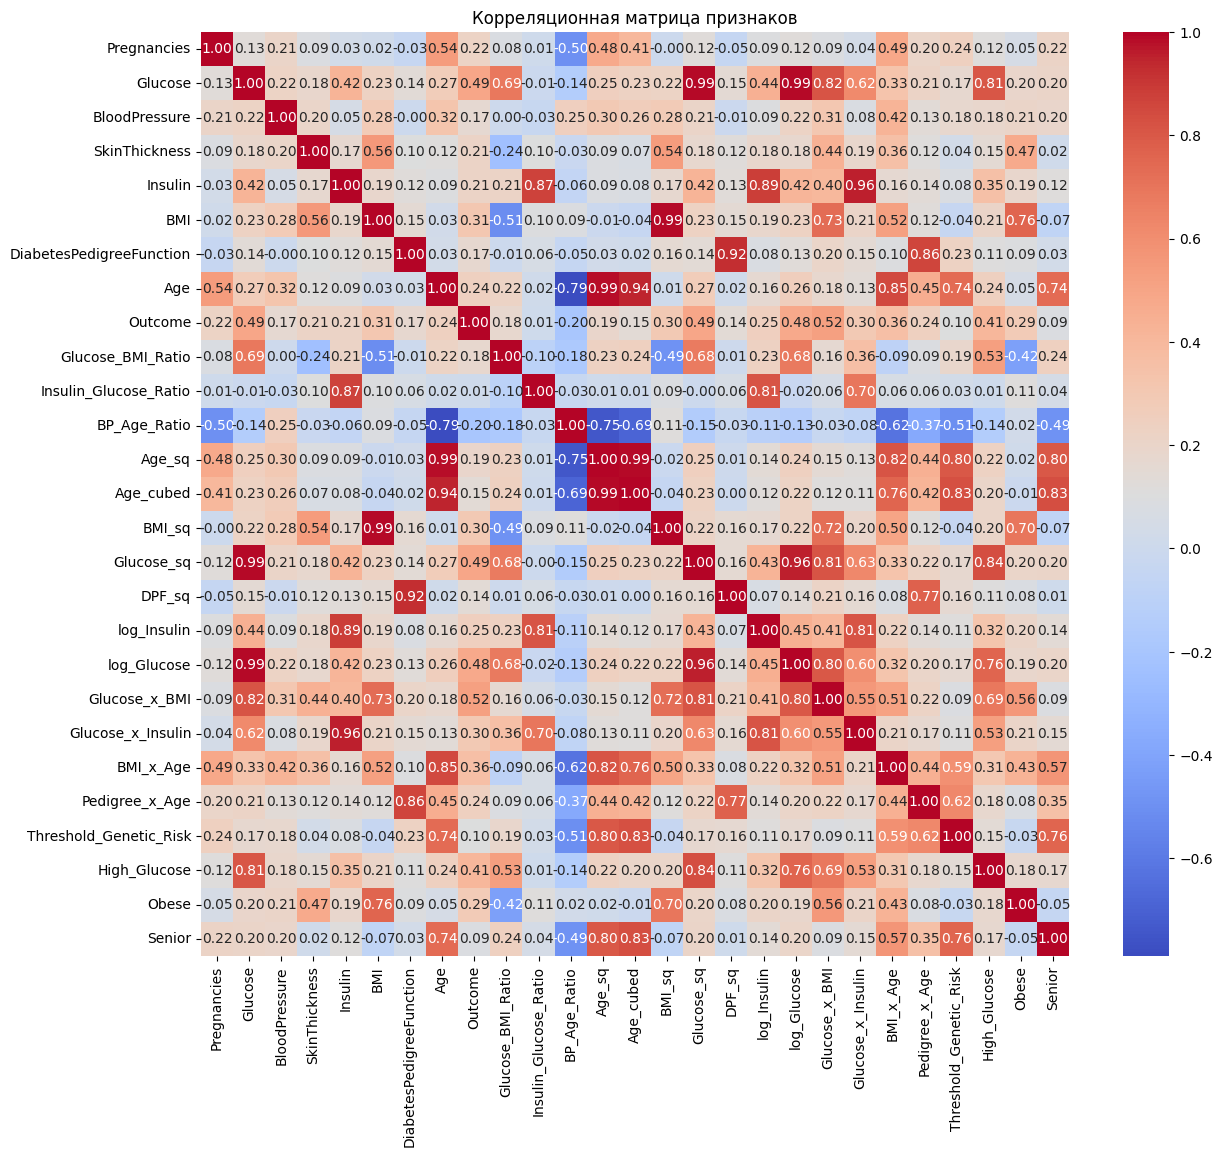

In [19]:
def draw_corr_matrix(df):
    plt.figure(figsize=(14,12))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Корреляционная матрица признаков")
    plt.show()

# example
draw_corr_matrix(df_lin)

Гистограмма распределения

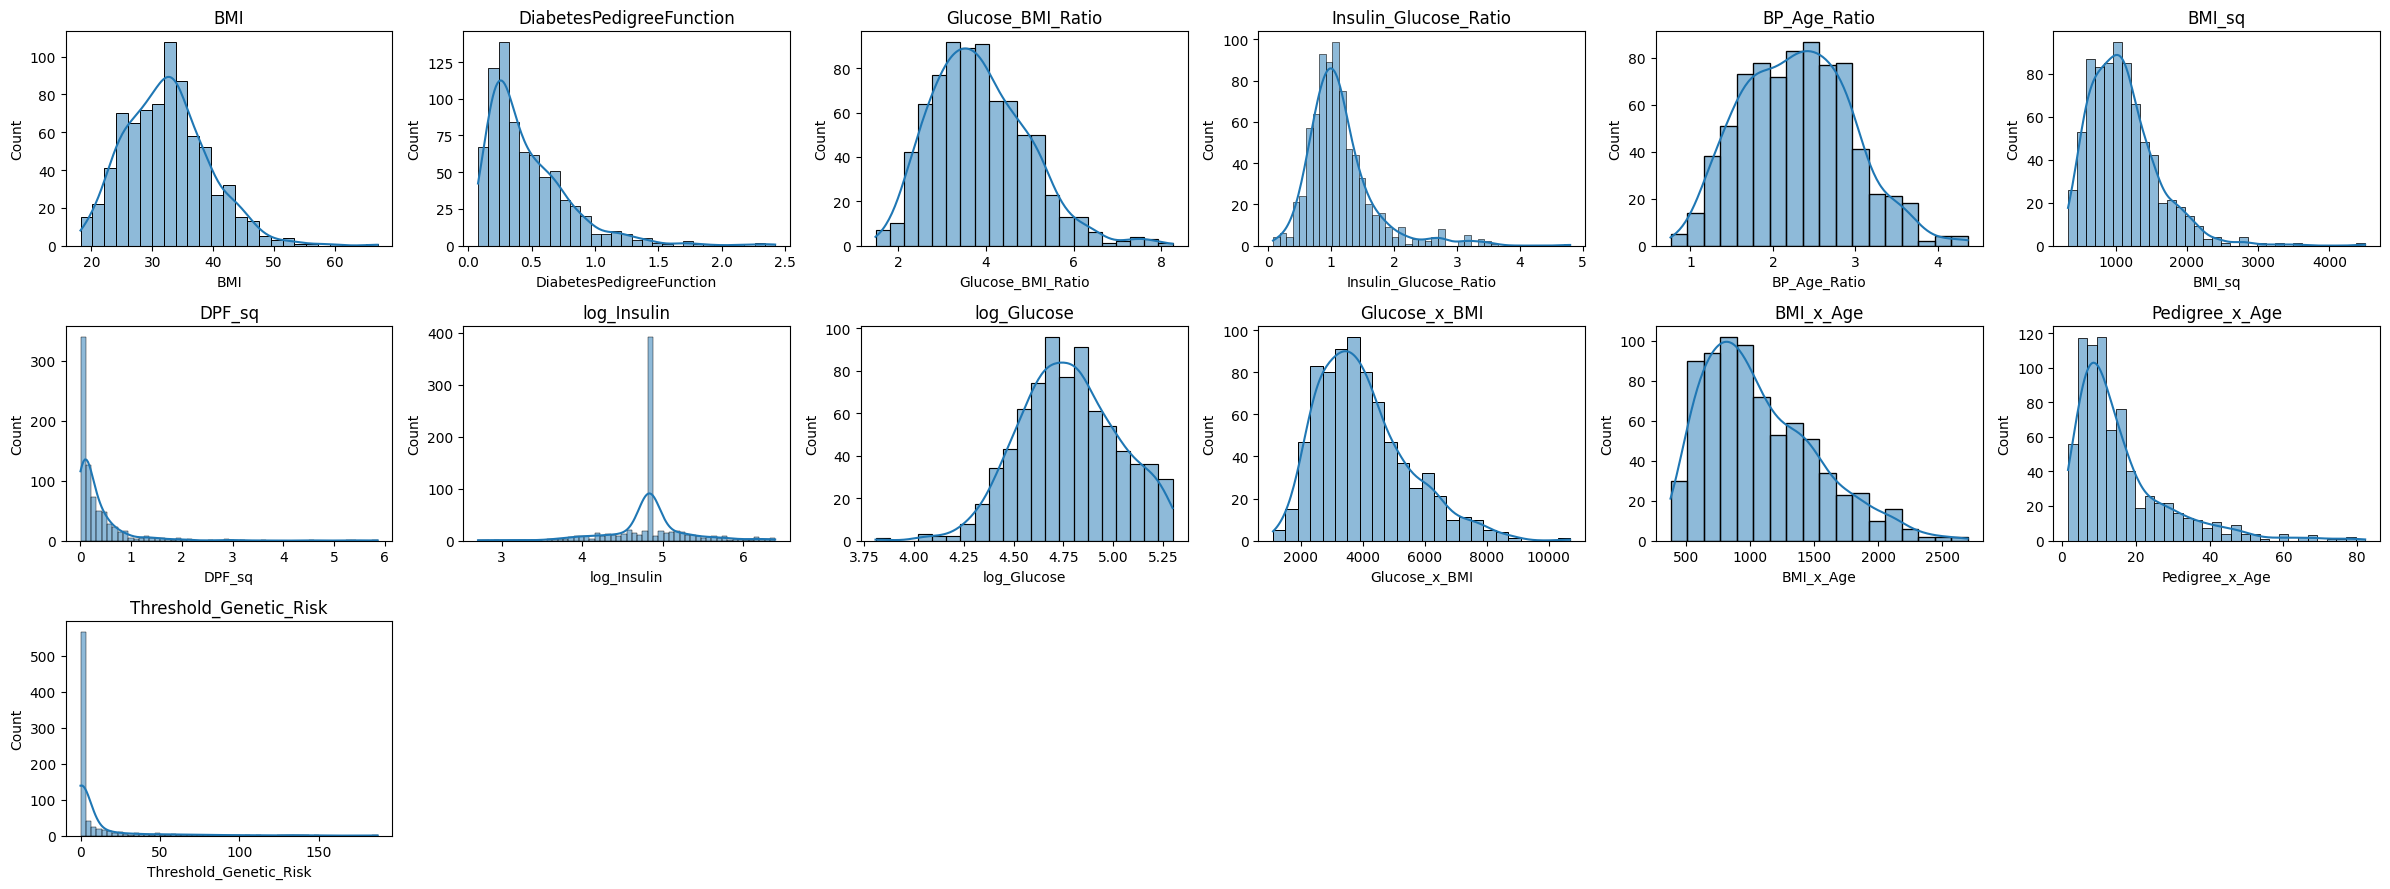

In [20]:
def draw_hist(df: pd.DataFrame, n_cols=6):
    float_cols = df.select_dtypes(include='float').columns
    n_rows = math.ceil(len(float_cols) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axs = axs.flatten()  # делаем одномерным массивом для удобства

    for i, col in enumerate(float_cols):
        sns.histplot(df[col], kde=True, ax=axs[i])
        axs[i].set_title(f'{col}')

    # Если графиков меньше, чем ячеек в сетке, скрываем лишние
    for j in range(i+1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# example
draw_hist(df_lin)

Соотношение с целевой переменной + коэфициент пирсона

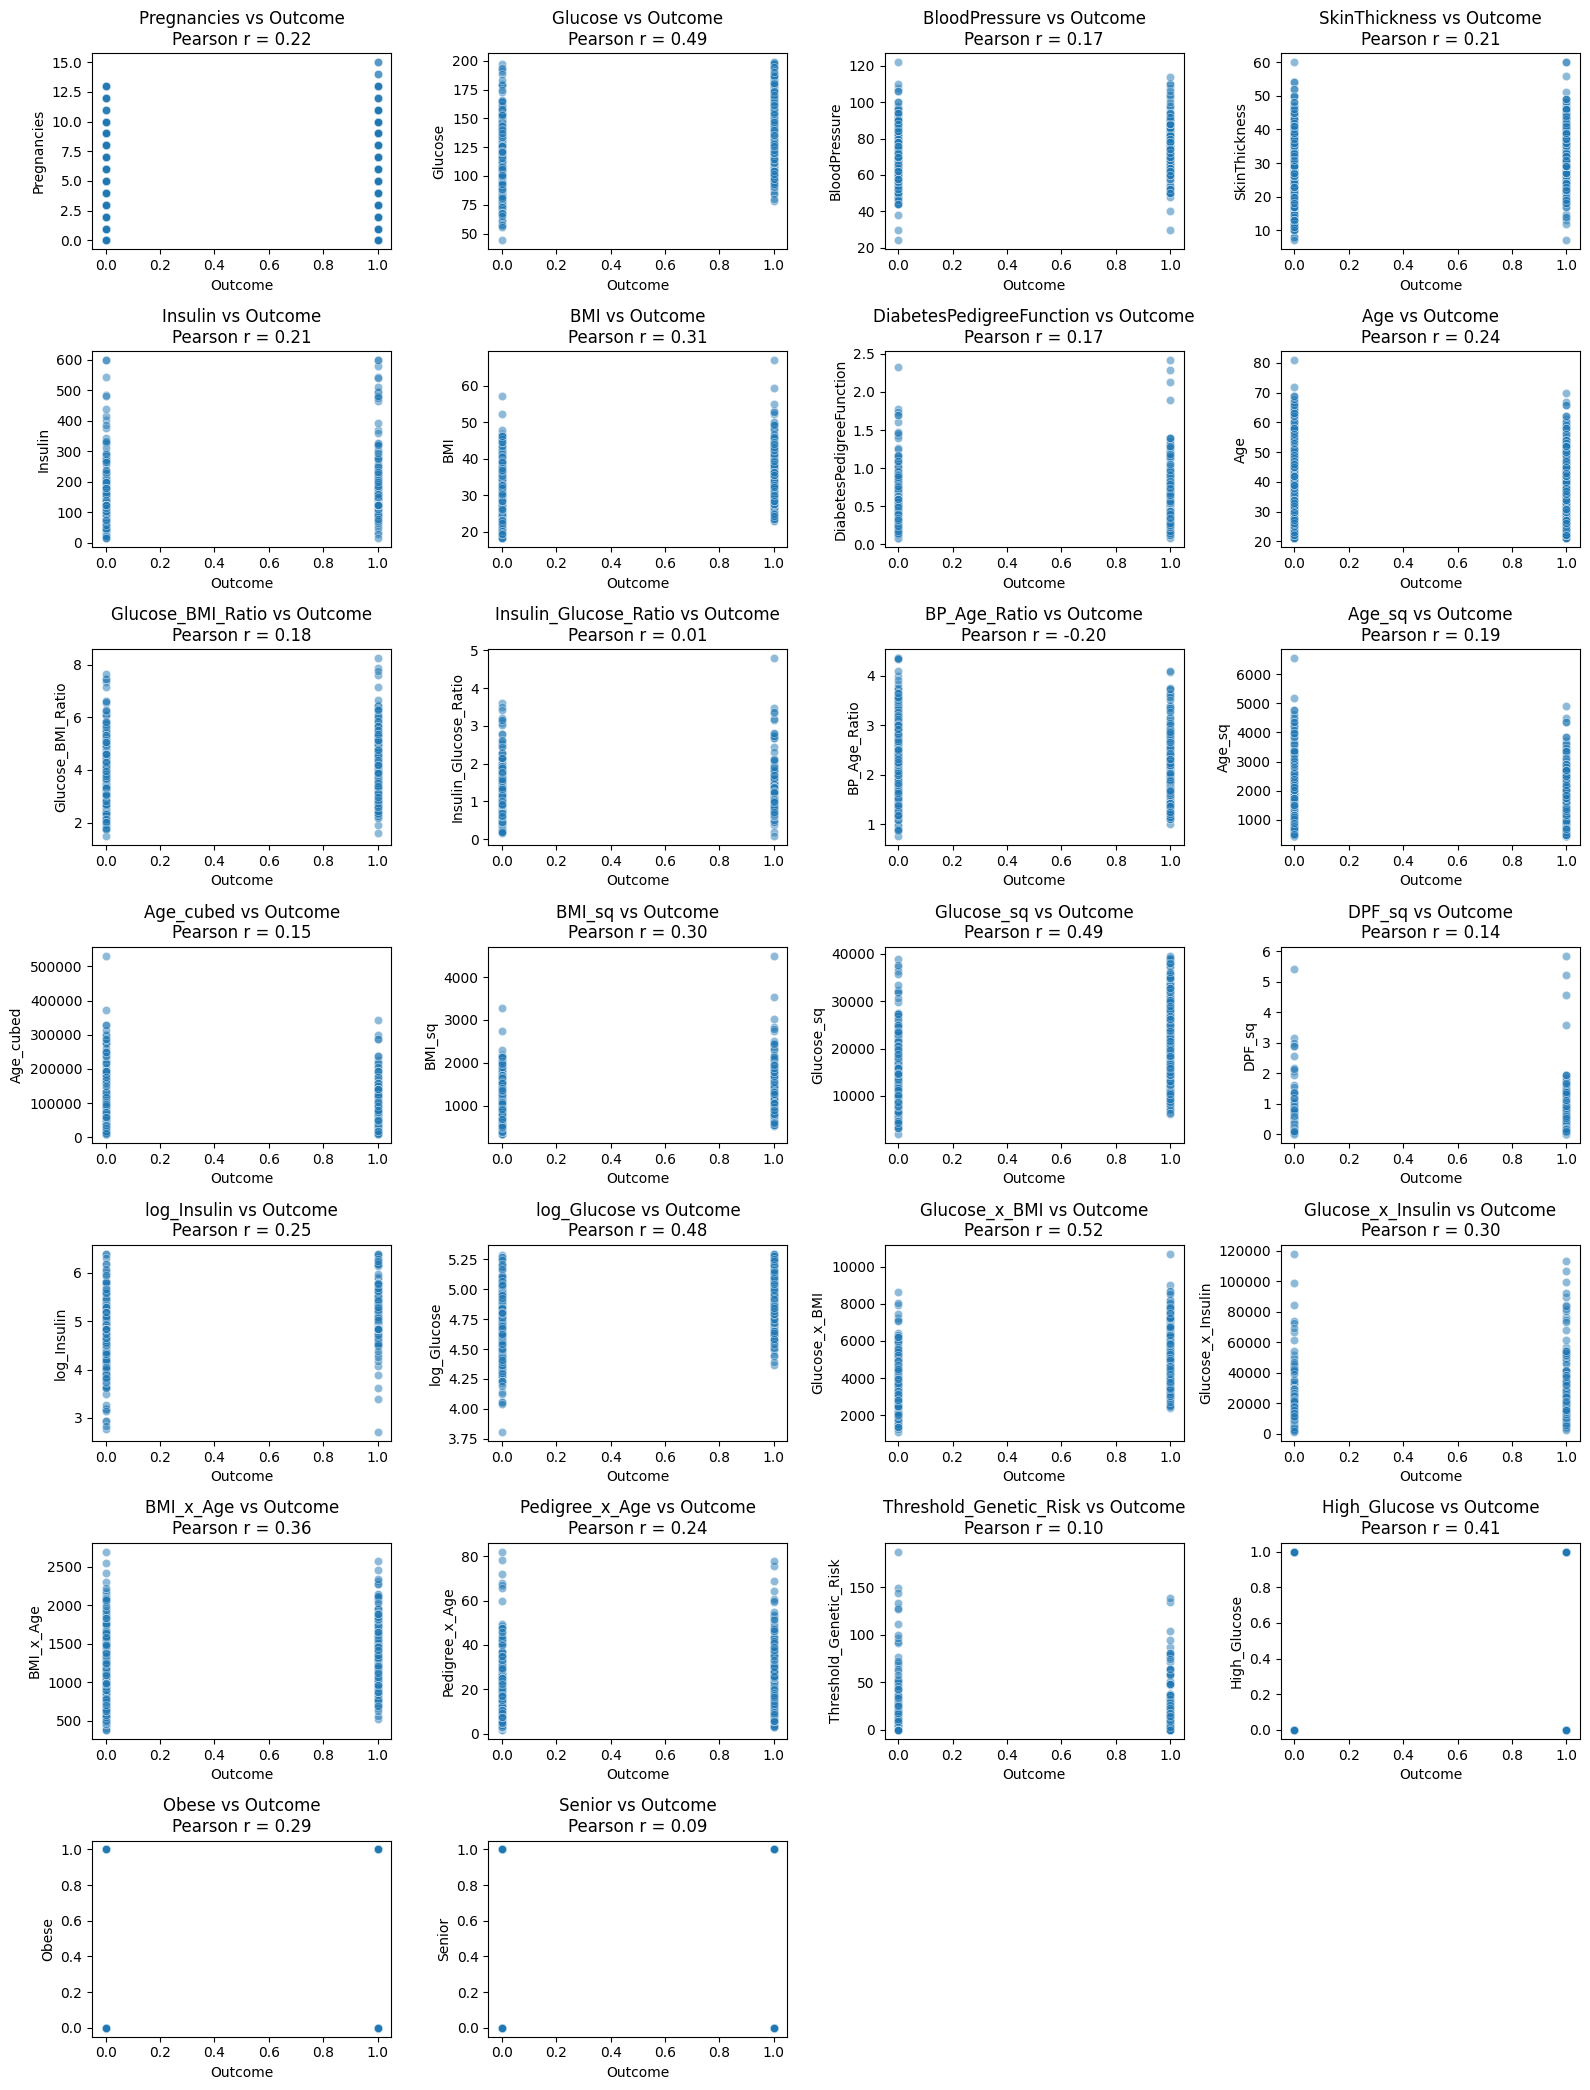

In [21]:
def draw_scatter_vs_target(df: pd.DataFrame, target: str, n_cols=4):
    float_cols = df.select_dtypes(include=['float', 'int']).columns.drop(target)
    n_rows = math.ceil(len(float_cols) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
    axs = axs.flatten()

    for i, col in enumerate(float_cols):
        sns.scatterplot(x=target, y=col, data=df, ax=axs[i], alpha=0.5)

        # коэффициент корреляции Пирсона
        corr = df[col].corr(df[target], method='pearson')
        axs[i].set_title(f'{col} vs {target}\nPearson r = {corr:.2f}')

    # скрываем лишние пустые ячейки
    for j in range(i+1, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()

draw_scatter_vs_target(df_fe.copy(), target="Outcome")


Ящик с усами

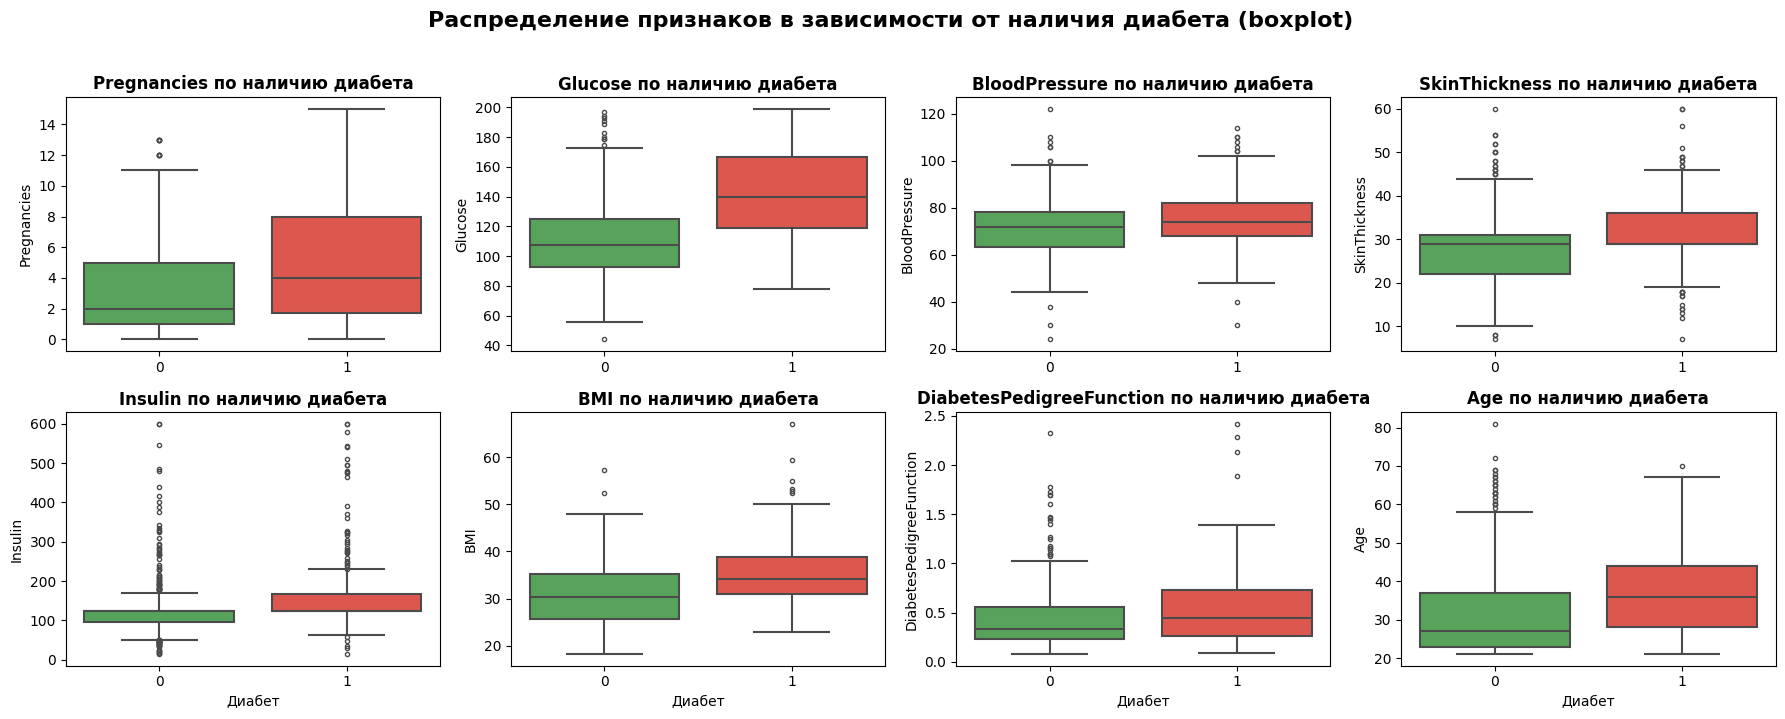

In [22]:
def draw_boxplots(df: pd.DataFrame, target: str = 'Outcome', n_cols=4):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(target)
    n_rows = math.ceil(len(numeric_cols) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4.5, n_rows*3.5))
    axs = axs.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(
            data=df, x=target, y=col, hue=target,
            palette={0: "#4CAF50", 1: "#F44336"},  # зелёный — здоров, красный — диабет
            ax=axs[i], linewidth=1.5, fliersize=3
        )
        axs[i].set_title(f'{col} по наличию диабета', fontsize=12, fontweight='bold')
        axs[i].set_xlabel('Диабет' if i >= len(numeric_cols) - n_cols else '')  # подпись только снизу
        axs[i].legend_.remove() 

    # Скрываем пустые ячейки
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

    plt.suptitle('Распределение признаков в зависимости от наличия диабета (boxplot)', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
draw_boxplots(df_clean, target='Outcome')

Удаление выбросов

In [23]:

df_outliers_clean = df_clean.copy()  
initial_rows = len(df_outliers_clean)
removed_total = 0
critical_cols = ['Insulin', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']

for col in critical_cols:
    Q1 = df_outliers_clean[col].quantile(0.25)
    Q3 = df_outliers_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 2.0 * IQR 
    upper = Q3 + 2.0 * IQR
    
    before = len(df_outliers_clean)
    df_outliers_clean = df_outliers_clean[
        (df_outliers_clean[col] >= lower) & (df_outliers_clean[col] <= upper)
    ]
    removed = before - len(df_outliers_clean)
    removed_total += removed
    if removed > 0:
        print(f"→ {col}: удалено {removed} строк (значения вне [{lower:.1f}, {upper:.1f}])")

# Дополнительно: жёстко обрезаем фантастические значения (опционально)
df_outliers_clean['Insulin'] = df_outliers_clean['Insulin'].clip(upper=600)
df_outliers_clean['SkinThickness'] = df_outliers_clean['SkinThickness'].clip(upper=60)
df_outliers_clean['Pregnancies'] = df_outliers_clean['Pregnancies'].clip(upper=14)

print(f"\nИТОГО: удалено всего {removed_total} строк из {initial_rows} ({removed_total/initial_rows*100:.2f}%)")
print(f"Осталось: {len(df_outliers_clean)} строк — идеально для обучения!")

# Сохраняем как основной датафрейм для дальнейшего Feature Engineering
df_final_clean = df_outliers_clean.reset_index(drop=True)


→ Insulin: удалено 339 строк (значения вне [110.0, 138.8])
→ SkinThickness: удалено 194 строк (значения вне [29.0, 29.0])
→ DiabetesPedigreeFunction: удалено 4 строк (значения вне [-0.5, 1.2])

ИТОГО: удалено всего 537 строк из 768 (69.92%)
Осталось: 231 строк — идеально для обучения!


Подготовка правых скосов

In [24]:
# обработка скосов
def prepare_skew(df: pd.DataFrame, columns: list[str]):
    for col in columns:
        df[col] = np.log1p(df[col])
    return df

#### 2.3.3. Посмотрим на выбросы переменных

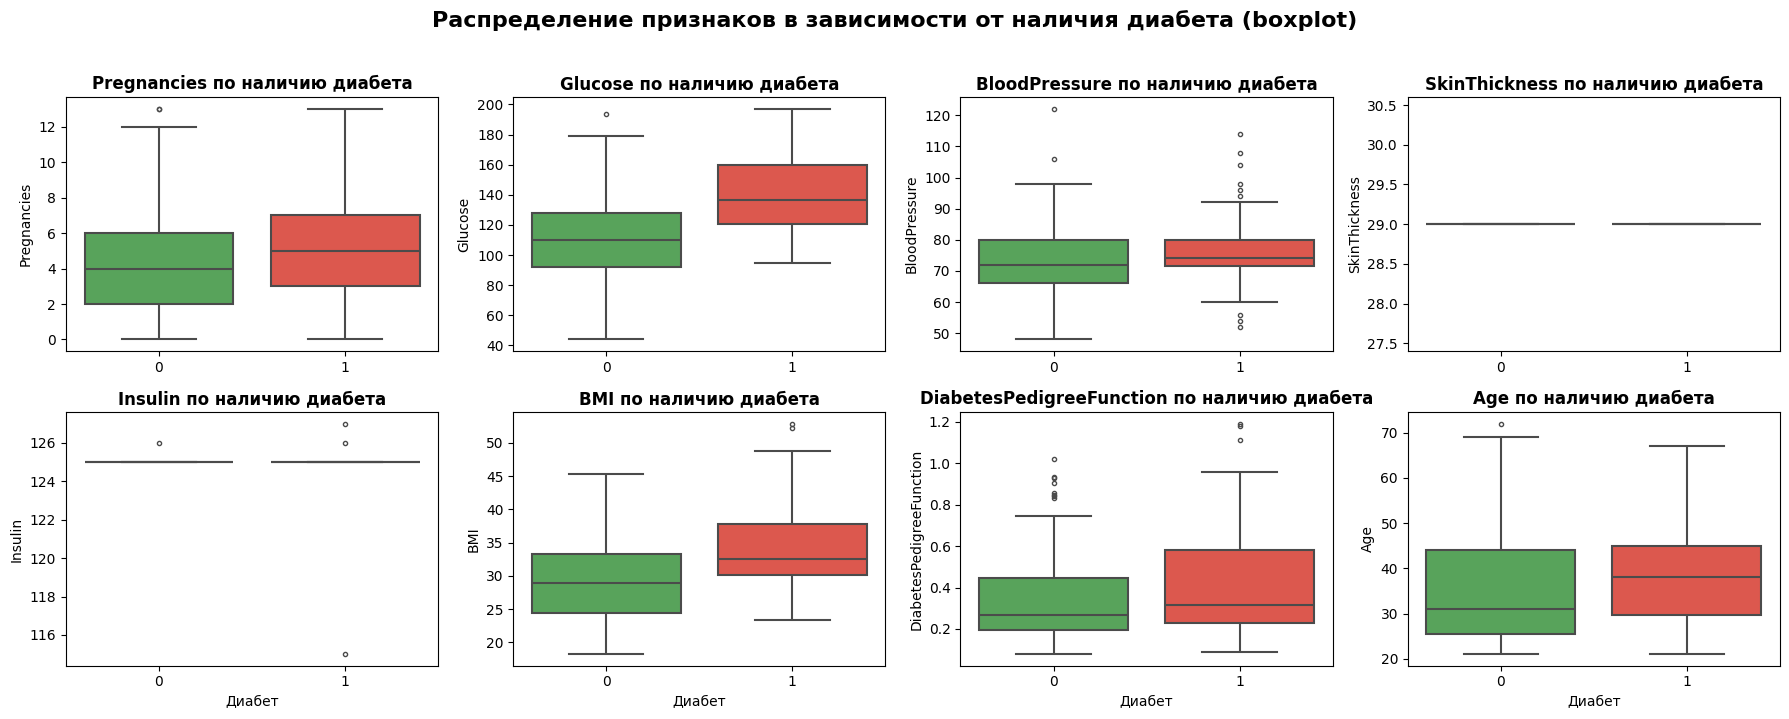

In [25]:
draw_boxplots(df_final_clean, 'Outcome', n_cols=4)

Удалим выбросы

In [26]:
df_processed = df_clean.copy()

print(f"До очистки выбросов: {df_processed.shape[0]} строк")
outlier_sensitive_cols = ['Insulin', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction', 'BMI']

def clip_outliers(df, columns, multiplier=1.5, verbose=True):
    df_clipped = df.copy()
    total_clipped = 0
    
    for col in columns:
        if col not in df_clipped.columns:
            continue
            
        Q1 = df_clipped[col].quantile(0.25)
        Q3 = df_clipped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        below = (df_clipped[col] < lower_bound).sum()
        above = (df_clipped[col] > upper_bound).sum()
        clipped = below + above
        
        if clipped > 0:
            df_clipped[col] = df_clipped[col].clip(lower_bound, upper_bound)
            total_clipped += clipped
            if verbose:
                print(f"{col:25} → обрезано {clipped:3} значений "
                      f"(диапазон: [{lower_bound:.1f} → {upper_bound:.1f}])")
    
    if verbose:
        print(f"\nГОТОВО! Обрезано {total_clipped} экстремальных значений")
        print(f"Осталось строк: {len(df_clipped)} (НИ ОДНА НЕ УДАЛЕНА!)")
    
    return df_clipped.reset_index(drop=True)

df_no_outliers = clip_outliers(
    df_processed,
    columns=outlier_sensitive_cols,
    multiplier=2.0,  
    verbose=True
)

df_no_outliers['Insulin'] = df_no_outliers['Insulin'].clip(upper=600)
df_no_outliers['SkinThickness'] = df_no_outliers['SkinThickness'].clip(upper=60)
df_no_outliers['Pregnancies'] = df_no_outliers['Pregnancies'].clip(upper=14)

print(f"\nФИНАЛЬНЫЙ РАЗМЕР: {df_no_outliers.shape}")
print("Данные полностью очищены и готовы к Feature Engineering и обучению!")


До очистки выбросов: 768 строк
Insulin                   → обрезано 339 значений (диапазон: [110.0 → 138.8])
SkinThickness             → обрезано  32 значений (диапазон: [11.0 → 46.0])
DiabetesPedigreeFunction  → обрезано  15 значений (диапазон: [-0.5 → 1.4])
BMI                       → обрезано   4 значений (диапазон: [9.3 → 54.8])

ГОТОВО! Обрезано 390 экстремальных значений
Осталось строк: 768 (НИ ОДНА НЕ УДАЛЕНА!)

ФИНАЛЬНЫЙ РАЗМЕР: (768, 9)
Данные полностью очищены и готовы к Feature Engineering и обучению!


#### 2.3.4. Посмотрим на скошенные столбцы справа

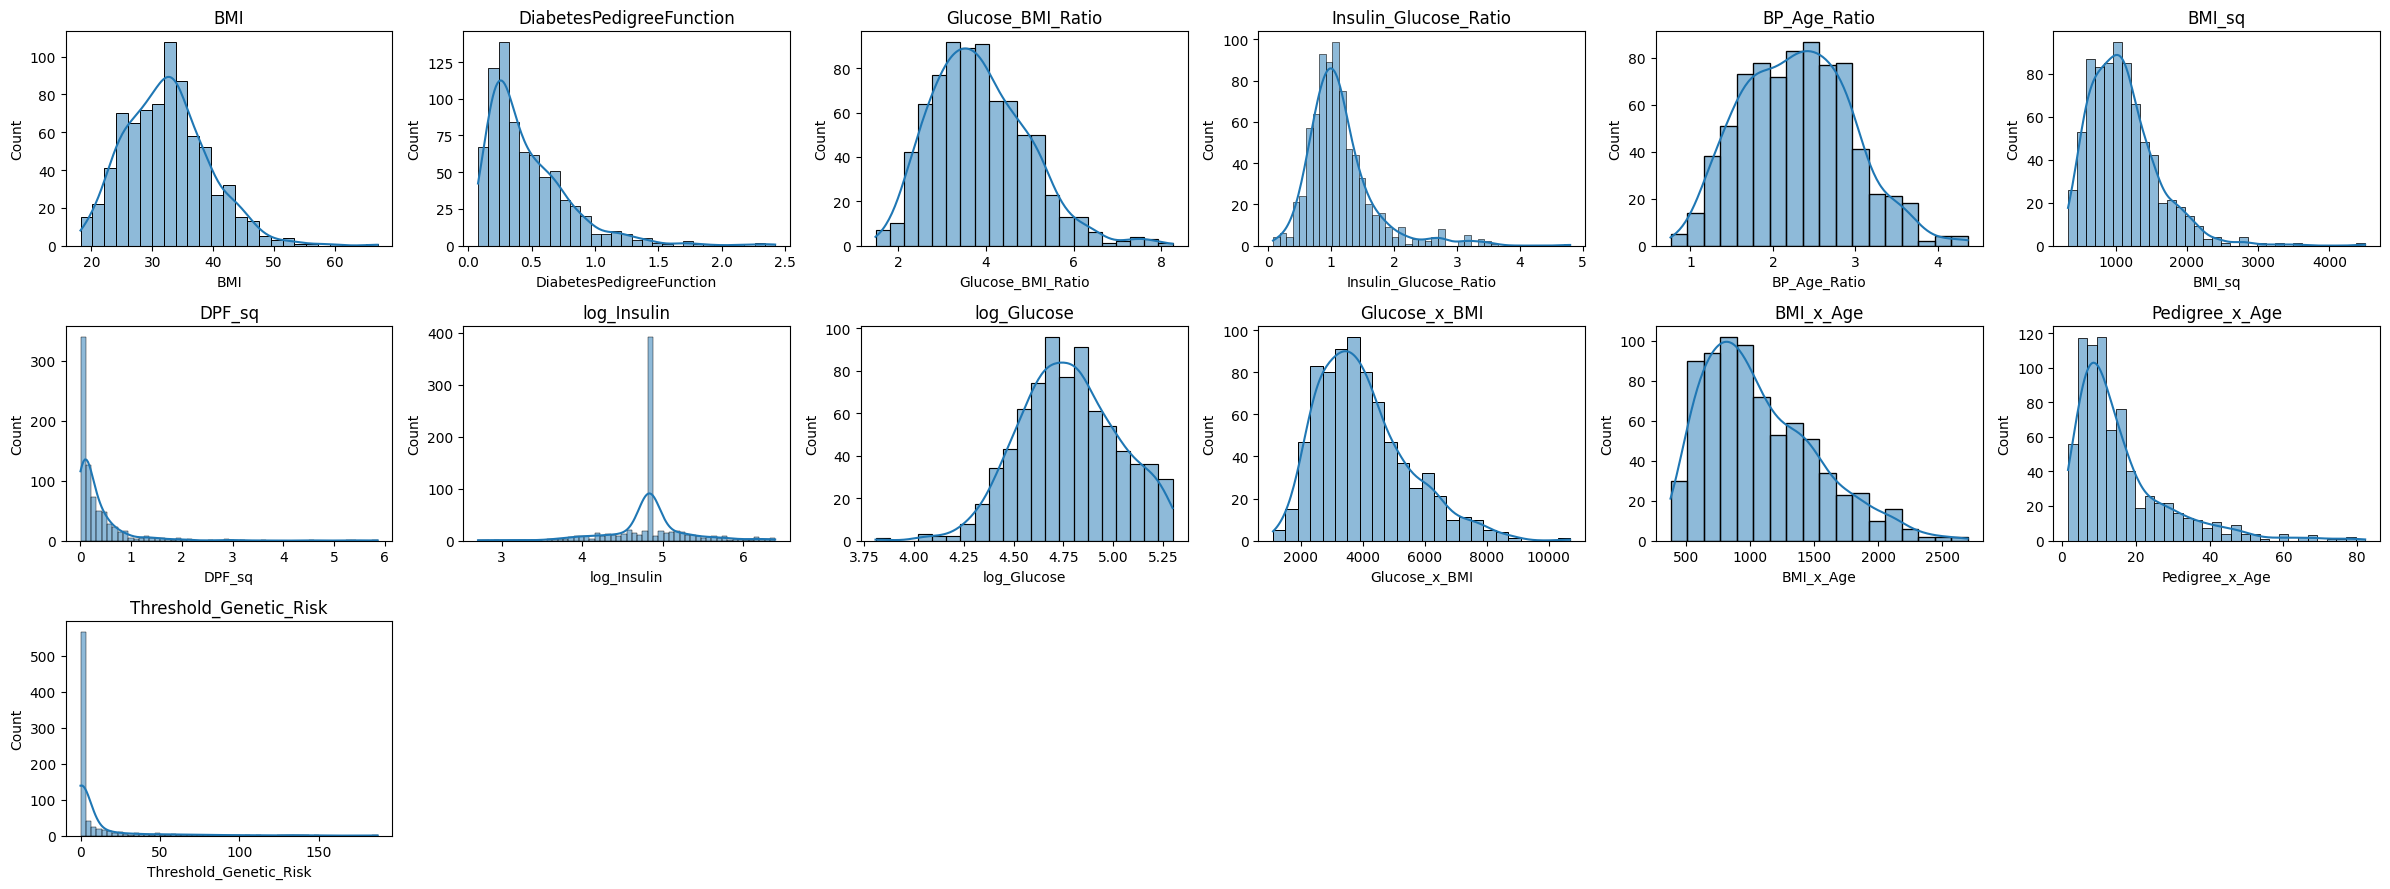

In [27]:
draw_hist(df_lin)

Пытаемся выровнять

In [28]:
skew_values = df_lin.skew()
skew_values_hard = skew_values[abs(skew_values) > 0.5]
skew_values_hard.index

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome', 'Glucose_BMI_Ratio', 'Insulin_Glucose_Ratio',
       'Age_sq', 'Age_cubed', 'BMI_sq', 'Glucose_sq', 'DPF_sq',
       'Glucose_x_BMI', 'Glucose_x_Insulin', 'BMI_x_Age', 'Pedigree_x_Age',
       'Threshold_Genetic_Risk', 'High_Glucose', 'Senior'],
      dtype='object')

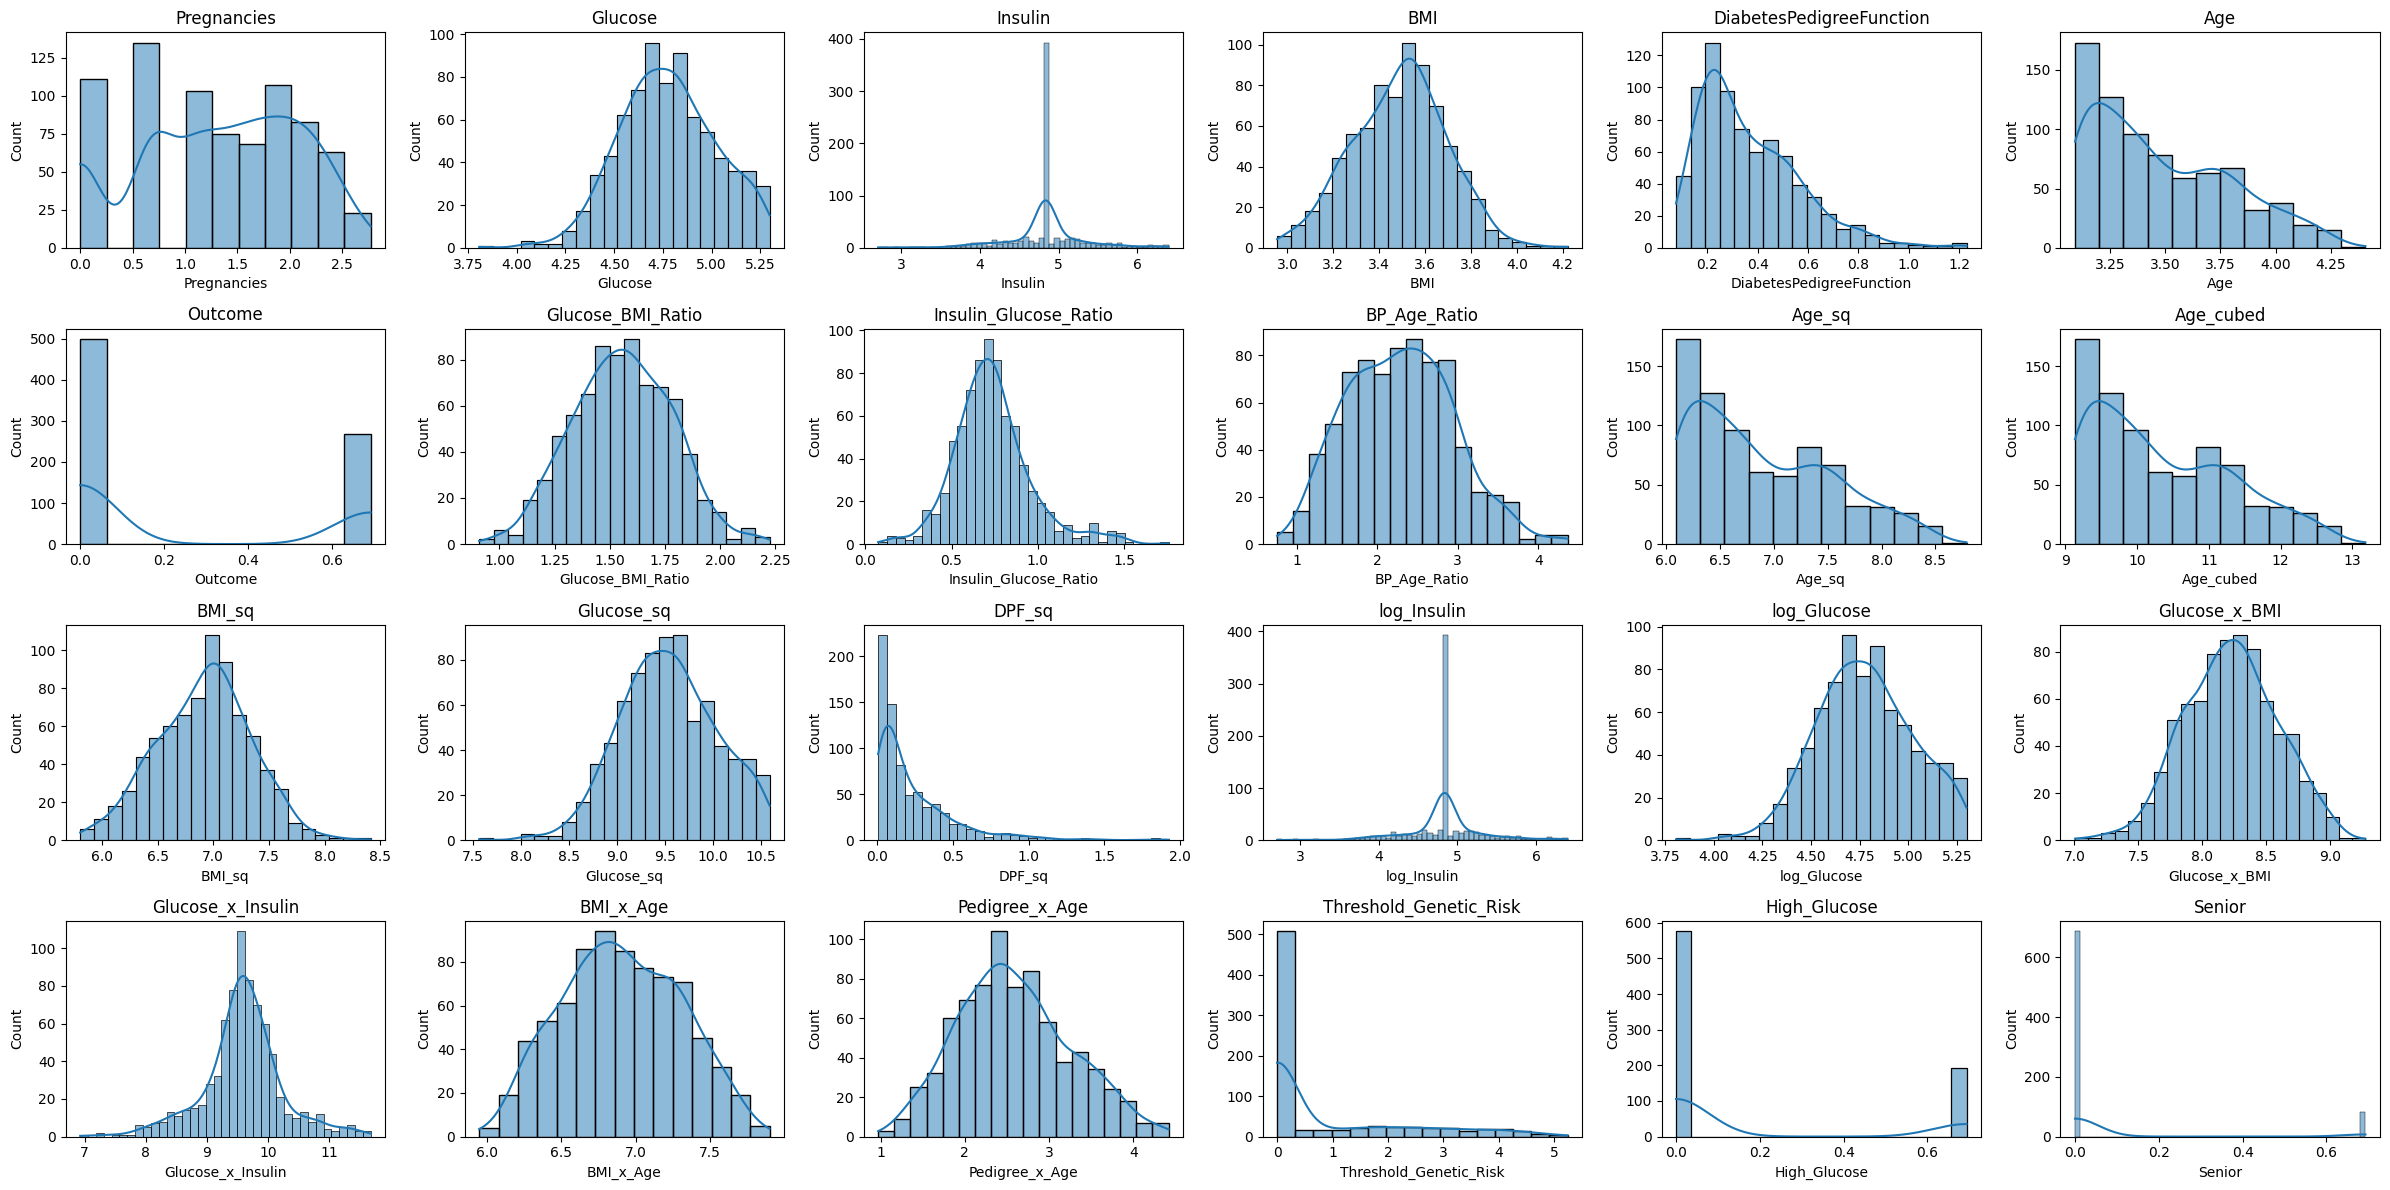

In [29]:
def prepare_skew(df, columns):
    df_new = df.copy()
    for col in columns:
        # Добавляем 1, чтобы избежать log(0)
       df_new[col] = np.log1p(df_new[col])
    return df_new

df_lin = prepare_skew(df = df_lin, columns = list(skew_values_hard.index))
draw_hist(df_lin)

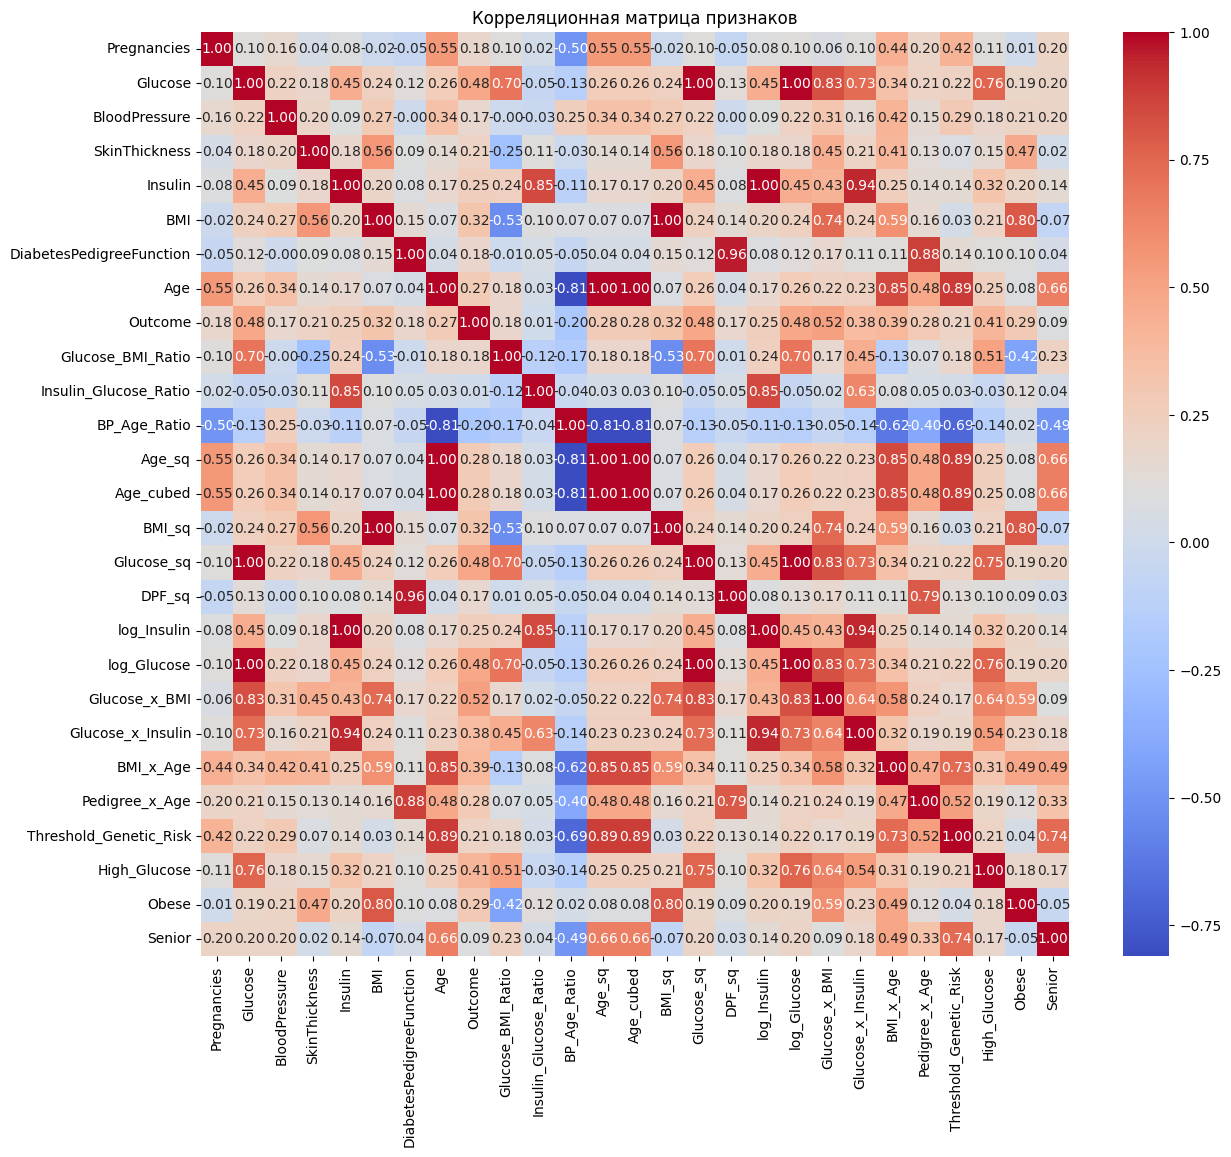

In [30]:
draw_corr_matrix(df_lin)

### 2.4. Разделение вида Фичи - Таргет

Для: `SVM`, `Linear Binary Classification`, `KNN`

In [31]:
X = df_fe.drop('Outcome', axis=1) 
y = df_fe['Outcome']

print("X — признаки:")
display(X.head(3))
print("y — целевая переменная:")
display(y.head(3))

X — признаки:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   

   DiabetesPedigreeFunction  Age  Glucose_BMI_Ratio  Insulin_Glucose_Ratio  \
0                     0.627   50           4.404762               0.838926   
1                     0.351   31           3.195489               1.453488   
2                     0.672   32           7.854077               0.679348   

   ...  log_Insulin  log_Glucose  Glucose_x_BMI  Glucose_x_Insulin  BMI_x_Age  \
0  ...     4.836282     5.003946         4972.8              18500     1680.0   
1  ...     4.836282     4.454347         2261.0              10625      824.6   
2  ...     4.836282     5.214936         4263.9              22875      745.6   

   Pedigree_x_Age  Threshold_Genetic_Risk  High_Glucose  Obese  Senior  
0          31.350               36.425408             1      1       0  
1          10.881                0.000000             0      0       0  
2          21.504                0.000000             1      0       0  

[3 rows x 26 columns]

y — целевая переменная:


0    1
1    0
2    1
Name: Outcome, dtype: int64

Для: `Desicion Tree`, `Random Forest` и `Gradient's Boosting Methods`

In [32]:
X = df_fe.drop('Outcome', axis=1) 
y = df_fe['Outcome']
display(X.head(3), y.head(3))

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   

   DiabetesPedigreeFunction  Age  Glucose_BMI_Ratio  Insulin_Glucose_Ratio  \
0                     0.627   50           4.404762               0.838926   
1                     0.351   31           3.195489               1.453488   
2                     0.672   32           7.854077               0.679348   

   ...  log_Insulin  log_Glucose  Glucose_x_BMI  Glucose_x_Insulin  BMI_x_Age  \
0  ...     4.836282     5.003946         4972.8              18500     1680.0   
1  ...     4.836282     4.454347         2261.0              10625      824.6   
2  ...     4.836282     5.214936         4263.9              22875      745.6   

   Pedigree_x_Age  Threshold_Genetic_Risk  High_Glucose  Obese  Senior  
0          31.350               36.425408             1      1       0  
1          10.881                0.000000             0      0       0  
2          21.504                0.000000             1      0       0  

[3 rows x 26 columns]

0    1
1    0
2    1
Name: Outcome, dtype: int64

## 3. Создание моделей

### 3.0. Создание `SVM`, `Linear Binary Classification`, `KNN`

#### Support Vector Machine

[Почитать 1](https://scikit-learn.org/stable/modules/svm.html)

[Почитать 2](https://t.me/devwhoami/179)

Метод опорных векторов (Support Vector Machine, **SVM**) — это мощный и популярный алгоритм **линейной** (и нелинейной) **классификации**.

Основная идея:

1.  **Разделяющая гиперплоскость**: SVM находит оптимальную гиперплоскость (линию в 2D, плоскость в 3D), которая **наилучшим образом разделяет** классы в вашем наборе данных.
2.  **Максимизация зазора (Margin)**: "Наилучшим образом" означает, что гиперплоскость должна находиться на **максимальном расстоянии** от ближайших точек каждого класса. Это расстояние называется **зазором (margin)**.
3.  **Опорные векторы (Support Vectors)**: Только те точки данных, которые находятся **ближе всего** к гиперплоскости и определяют ширину зазора, называются **опорными векторами**. Эти точки имеют решающее значение; если их удалить, положение гиперплоскости может измениться.
4.  **Ядерный трюк (Kernel Trick)**: Для **нелинейно** разделимых данных SVM использует так называемый **ядерный трюк**. Он неявно проецирует данные в пространство более высокой размерности, где классы становятся линейно разделимыми, и находит там оптимальную гиперплоскость.

**Кратко**: SVM строит **широчайший возможный "коридор"** между классами, опираясь только на самые сложные (граничные) точки — опорные векторы.

In [33]:
from sklearn.svm import SVC

model_svm = SVC(
    C=1.0,           # Параметр регуляризации. Чем меньше C, тем шире зазор, тем больше ошибок допускается (сильнее регуляризация).
                     # Варианты: 0.1, 1, 10, 100.

    kernel='rbf',    # Тип ядра. Определяет, как данные будут проецироваться в пространство более высокой размерности.
                     # Варианты: 'linear' (линейный классификатор), 'poly' (полиномиальный),
                     # 'rbf' (Радиальная базисная функция - наиболее часто используется для нелинейных задач), 'sigmoid'.

    gamma='scale',   # Коэффициент ядра (для 'rbf', 'poly', 'sigmoid'). Определяет "влияние" одного обучающего примера.
                     # Варианты: 'scale' (1 / (n_features * X.var())) или 'auto' (1 / n_features) - рекомендуются по умолчанию.
                     # Или: небольшие значения (0.01, 0.1) для широкого влияния; большие значения (1, 10) для узкого влияния.

    degree=3,        # Степень полинома (для 'poly' ядра). Игнорируется для других ядер.
                     # Варианты: 2, 3, 4.

    random_state=RANDOM_STATE, # Для воспроизводимости результатов.

    probability=False # Включает оценку вероятности классов (медленнее, но иногда нужно).
                      # Варианты: True (если нужны предсказанные вероятности), False (по умолчанию, если нужна только классификация).
)


#### Logistic Regression

**Логистическая регрессия — краткое пояснение:**

Логистическая регрессия — это метод машинного обучения, используемый для решения задач **классификации**, то есть когда нужно предсказать, к какому классу принадлежит объект (например, «да/нет», «0/1»).

В отличие от линейной регрессии, логистическая регрессия предсказывает **вероятность принадлежности** объекта к определённому классу. Для этого используется **логистическая (сигмоидная) функция**, которая преобразует линейную комбинацию признаков в значение от 0 до 1.

Основные шаги:

1. Строится линейная модель:
    $$z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$
2. К результату применяется сигмоида:
   $$p = \frac{1}{1 + e^{-z}}$$
3. Если ($p > 0.5$), то объект относят к классу 1, иначе — к классу 0.

Модель обучается с помощью **максимизации правдоподобия** (обычно через метод градиентного спуска).


In [34]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(
    penalty='l2',        # Тип регуляризации, добавляемой для предотвращения переобучения.
                         # 'l2' — стандартная (ридж-регуляризация), 'l1' — лассо-регуляризация (зануляет некоторые коэффициенты).
                         # Варианты: 'l1', 'l2', 'elasticnet', 'none'.

    C=1.0,               # Обратный коэффициент силы регуляризации.
                         # Чем меньше C — тем сильнее регуляризация (жестче штраф за большие коэффициенты).
                         # Варианты: 0.01, 0.1, 1, 10, 100.

    solver='lbfgs',      # Алгоритм оптимизации для нахождения весов модели.
                         # 'lbfgs' — универсальный и быстрый (подходит для малых и средних наборов данных).
                         # Другие варианты: 'liblinear' (поддерживает L1), 'saga' (работает с большими данными и L1/L2), 'newton-cg'.

    max_iter=100,        # Максимальное число итераций для сходимости алгоритма.
                         # Если обучение не сходится — увеличить, например до 500.

    random_state=RANDOM_STATE, # Для воспроизводимости результатов (фиксирует начальные веса).

    fit_intercept=True,  # Добавляет свободный коэффициент (смещение) в модель.
                         # Обычно True, чтобы учитывать среднее значение признаков.

    n_jobs=None          # Количество потоков для параллельных вычислений.
                         # None — одно ядро, -1 — использовать все доступные ядра процессора.
)


#### K-Nearest Neighbors (KNN)

**Метод k-ближайших соседей — краткое пояснение:**

KNN (*k-nearest neighbors*) — это простой и интуитивный метод машинного обучения, применяемый для задач **классификации** и **регрессии**.
Он не строит явной модели — вместо этого принимает решение, основываясь на **схожести объектов** в пространстве признаков.

Идея метода:
Для нового объекта алгоритм ищет **k ближайших соседей** из обучающей выборки (по выбранной метрике расстояния) и определяет класс по **голосованию** этих соседей.

Основные шаги:

1. Выбирается число соседей $k$ — например, 3 или 5.
2. Для нового объекта вычисляются расстояния до всех объектов обучающей выборки.
3. Определяются $k$ ближайших точек.
4. Класс объекта определяется по большинству классов среди соседей.

Метод KNN **не имеет этапа обучения**, так как просто запоминает обучающие данные.
Основной параметр, влияющий на качество модели — это число соседей $k$:

* Малое $k$ делает модель чувствительной к шуму.
* Большое $k$ сглаживает границы между классами.


In [35]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(
    n_neighbors=5,      # Количество ближайших соседей (k).
                        # Малое значение делает модель чувствительной к шуму, большое — сглаживает предсказания.
                        # Варианты: 3, 5, 7, 9 и т.д.

    weights='uniform',  # Веса соседей при голосовании.
                        # 'uniform' — все соседи равны,
                        # 'distance' — соседи ближе к объекту имеют больший вес.

    metric='minkowski', # Метрика расстояния.
                        # По умолчанию 'minkowski' с p=2 соответствует евклидову расстоянию.
                        # Варианты: 'euclidean', 'manhattan', 'chebyshev', 'minkowski'.

    p=2,                # Степень метрики Минковского (p=1 — манхэттен, p=2 — евклид).
                        # Меняется только если выбран 'minkowski'.

    algorithm='auto',   # Алгоритм поиска ближайших соседей.
                        # 'auto' выбирает оптимальный метод (ball_tree, kd_tree, brute) в зависимости от данных.

    n_jobs=None         # Количество потоков для вычислений.
                        # None — одно ядро, -1 — использовать все доступные ядра процессора.
)

### 3.1. Создание `Desicion Tree`, `Random Forest`

#### Decision Tree Classifier (Дерево решений)

**Дерево решений — краткое пояснение:**

Дерево решений — это алгоритм **классификации и регрессии**, который принимает решения, разбивая данные по признакам в виде **дерева с узлами и ветвями**.
Каждый узел дерева соответствует условию на значение признака (например, «возраст > 30?»), а листья — это **предсказанные классы**.

Идея метода:
Алгоритм рекурсивно делит выборку на подмножества так, чтобы в каждом из них объекты как можно больше принадлежали одному классу.
Критерием “хорошего разбиения” служат меры **чистоты узла** — например, *Gini* или *энтропия*.

Основные шаги:

1. Выбирается признак и порог, которые лучше всего разделяют данные по целевой переменной.
2. Создаются новые ветви для каждого значения или диапазона признака.
3. Процесс повторяется до тех пор, пока не достигнуты условия остановки (например, максимальная глубина).
4. Листовые узлы содержат итоговые классы.

Преимущества:

* Простая интерпретация (можно визуализировать дерево).
* Не требует масштабирования данных.

Недостатки:

* Склонно к **переобучению**, особенно при большой глубине дерева.
* Может быть нестабильным (небольшие изменения данных → другое дерево).

In [36]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(
    criterion='gini',       # Критерий качества разбиения.
                            # 'gini' — индекс Джини (по умолчанию),
                            # 'entropy' — энтропия (информационный выигрыш),
                            # 'log_loss' — основан на логарифмической потере.

    splitter='best',        # Стратегия выбора признака для разбиения.
                            # 'best' — выбирает наилучшее разбиение,
                            # 'random' — выбирает случайный признак (для ускорения и разнообразия).

    max_depth=None,         # Максимальная глубина дерева.
                            # None — без ограничения (может привести к переобучению).
                            # Примеры: 3, 5, 10.

    min_samples_split=2,    # Минимальное число образцов для разбиения узла.
                            # Увеличение этого параметра уменьшает переобучение.

    min_samples_leaf=1,     # Минимальное количество образцов в листе.
                            # Увеличение значения делает дерево более “гладким”.

    random_state=RANDOM_STATE, # Для воспроизводимости результатов.

    max_features=None,      # Количество признаков, рассматриваемых при каждом разбиении.
                            # None — использовать все признаки.

    class_weight=None       # Веса классов для компенсации дисбаланса.
                            # Например: 'balanced' — автоматически выравнивает частоты классов.
)


#### Random Forest Classifier (Случайный лес)

**Случайный лес — краткое пояснение:**

Случайный лес — это ансамблевый метод машинного обучения, основанный на **множестве деревьев решений**, каждое из которых обучается независимо на случайных подвыборках данных и признаков.
Модель объединяет результаты всех деревьев (обычно **путём голосования**) для получения более устойчивого и точного предсказания.

Идея метода:
Вместо одного дерева (которое может переобучаться), алгоритм строит **множество случайных деревьев**, каждое из которых "смотрит" на разные части данных.
В результате снижается разброс модели и повышается обобщающая способность.

Основные шаги:

1. Из исходных данных случайно выбираются подмножества объектов (методом *bootstrap*).
2. Для каждого дерева случайно выбирается подмножество признаков.
3. Каждое дерево строится независимо, как обычное дерево решений.
4. При классификации итоговый класс выбирается **по большинству голосов деревьев**.

Преимущества:

* Устойчив к переобучению.
* Хорошо работает “из коробки” без сильной настройки параметров.
* Может оценивать важность признаков (*feature importance*).

Недостатки:

* Менее интерпретируем, чем одно дерево.
* Медленнее при очень больших данных.


In [37]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(
    n_estimators=100,        # Количество деревьев в лесе.
                             # Большее число деревьев обычно улучшает качество, но увеличивает время обучения.
                             # Варианты: 50, 100, 200, 500.

    criterion='gini',        # Критерий качества разбиений для каждого дерева.
                             # 'gini' — индекс Джини (по умолчанию),
                             # 'entropy' — энтропия.

    max_depth=None,          # Максимальная глубина каждого дерева.
                             # None — без ограничения (может переобучаться).
                             # Примеры: 5, 10, 20.

    min_samples_split=2,     # Минимальное количество образцов для разбиения узла.
                             # Увеличение уменьшает переобучение.

    min_samples_leaf=1,      # Минимальное количество образцов в листе.
                             # Увеличение делает модель более "плавной".

    max_features='sqrt',     # Количество признаков, используемых при поиске лучшего разбиения.
                             # 'sqrt' — стандарт для классификации (корень из числа признаков).
                             # 'log2' — логарифм по основанию 2, или число/доля признаков.

    bootstrap=True,          # Использовать ли bootstrap-подвыборки при обучении деревьев.
                             # True — стандартный вариант, False — использовать все данные.

    random_state=RANDOM_STATE, # Для воспроизводимости результатов.

    n_jobs=None,             # Количество потоков.
                             # None — одно ядро, -1 — использовать все ядра процессора.

    class_weight=None        # Веса классов для компенсации дисбаланса.
                             # 'balanced' — автоматически выравнивает частоты классов.
)

### 3.2. Создание `Gradient's Boosting Methods`

#### Gradient Boosting Classifier (Градиентный бустинг)

**Градиентный бустинг — краткое пояснение:**

Градиентный бустинг — это **ансамблевый метод**, который строит **последовательность слабых моделей** (обычно небольших деревьев решений), где каждая новая модель **исправляет ошибки предыдущих**.
В отличие от случайного леса, где деревья строятся **независимо**, в бустинге каждое следующее дерево обучается **на остатках (ошибках)** предыдущих.

Идея метода:

1. Обучается первое дерево, которое делает начальные предсказания.
2. Вычисляются ошибки (разница между предсказанными и истинными значениями).
3. Следующее дерево обучается предсказывать эти ошибки.
4. Итоговое предсказание — сумма (или взвешенная комбинация) всех деревьев.

Благодаря этому модель постепенно **минимизирует функцию потерь** и достигает высокой точности.

Преимущества:

* Очень высокая точность при правильной настройке.
* Хорошо работает с числовыми и категориальными признаками.
* Можно контролировать переобучение через глубину деревьев и скорость обучения.

Недостатки:

* Медленнее в обучении, чем случайный лес.
* Требует подбора гиперпараметров.
* Может переобучаться при слишком большом количестве деревьев.

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(
    loss='log_loss',        # Функция потерь, которую минимизирует алгоритм.
                            # 'log_loss' — для классификации (по умолчанию),
                            # 'exponential' — аналог AdaBoost.

    learning_rate=0.1,      # Скорость обучения (вклад каждого дерева в общий результат).
                            # Меньшие значения (0.01–0.1) делают обучение стабильнее, но требуют больше деревьев.

    n_estimators=100,       # Количество слабых моделей (деревьев).
                            # Большее число может повысить точность, но и риск переобучения.

    subsample=1.0,          # Доля выборки, используемая для обучения каждого дерева.
                            # Значения < 1.0 добавляют стохастичность (ускоряют и уменьшают переобучение).

    criterion='friedman_mse', # Критерий качества разбиений.
                              # 'friedman_mse' — оптимальный для бустинга,
                              # 'squared_error' и 'mse' — классические варианты.

    min_samples_split=2,    # Минимальное число образцов для разбиения узла.

    min_samples_leaf=1,     # Минимальное число образцов в листе.

    max_depth=3,            # Максимальная глубина базовых деревьев.
                            # Малые значения (3–5) обычно предотвращают переобучение.

    random_state=RANDOM_STATE, # Для воспроизводимости результатов.

    max_features=None,      # Количество признаков при разбиении.
                            # None — использовать все признаки, 'sqrt' или 'log2' — случайное подмножество.

    verbose=0               # Если >0, выводит процесс обучения (для отладки).
)


#### XGBoost (Extreme Gradient Boosting)

**XGBoost — краткое пояснение:**

**XGBoost (Extreme Gradient Boosting)** — это усовершенствованная реализация градиентного бустинга, созданная для **скорости, эффективности и точности**.
Он работает по тем же принципам, что и обычный **Gradient Boosting**, но добавляет оптимизации на уровне вычислений, регуляризации и обработки пропусков.

XGBoost строит ансамбль из множества **деревьев решений**, каждое из которых **исправляет ошибки предыдущих**, минимизируя функцию потерь с помощью **градиентного спуска**.

Особенности XGBoost:

* Использует **L1 и L2 регуляризацию**, что снижает переобучение.
* Поддерживает **параллельное обучение** деревьев.
* Эффективно работает с **пропущенными данными**.
* Может применяться не только для классификации, но и для регрессии, ранжирования и др.

Преимущества:

* Очень высокая точность.
* Быстрее классического `GradientBoostingClassifier`.
* Гибкость — множество гиперпараметров для точной настройки.

Недостатки:

* Сложнее в настройке.
* Требует больше памяти и вычислительных ресурсов.


In [39]:
try:
    from xgboost import XGBClassifier
    print("XGBoost успешно импортирован!")
except ModuleNotFoundError:
    !pip install xgboost
    from xgboost import XGBClassifier
    print("XGBoost успешно установлен и импортирован!")

XGBoost успешно импортирован!


In [40]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    n_estimators=100,        # Количество деревьев (итераций бустинга).
                            # Увеличение может повысить качество, но и риск переобучения.

    learning_rate=0.1,       # Скорость обучения (вклад каждого дерева).
                            # Меньшие значения (0.01–0.1) требуют большего числа деревьев.

    max_depth=3,             # Максимальная глубина деревьев.
                            # Контролирует сложность модели — большее значение → выше риск переобучения.

    subsample=1.0,           # Доля выборки, используемая при построении каждого дерева.
                            # Меньше 1.0 → случайность и снижение переобучения.

    colsample_bytree=1.0,    # Доля признаков, выбираемых при построении каждого дерева.
                            # Обычно 0.8–1.0 — для ускорения и устойчивости.

    gamma=0,                 # Минимальное улучшение функции потерь для разбиения узла.
                            # Увеличение gamma делает модель более консервативной.

    reg_alpha=0,             # L1-регуляризация (на коэффициенты).
                            # Увеличение помогает убрать незначимые признаки.

    reg_lambda=1,            # L2-регуляризация (по умолчанию).
                            # Контролирует переобучение через штраф на большие веса.

    objective='binary:logistic', # Функция потерь.
                                 # 'binary:logistic' — для бинарной классификации (0/1),
                                 # 'multi:softmax' — для многоклассовой (требует num_class).

    random_state=RANDOM_STATE,   # Для воспроизводимости результатов.

    n_jobs=-1,              # Использовать все ядра процессора для ускорения обучения.

    verbosity=0             # Уровень вывода (0 — без вывода, 1–3 — подробные логи).
)

#### CatBoost Classifier (Categorical Boosting, от Яндекса)

**CatBoost** — это современный алгоритм **градиентного бустинга**, разработанный компанией **Яндекс**.
Название расшифровывается как *“Categorical Boosting”*, поскольку он изначально создан для **работы с категориальными признаками** — без необходимости их кодировать вручную (в отличие от XGBoost или LightGBM).

CatBoost строит ансамбль **решающих деревьев**, где каждое следующее дерево **исправляет ошибки предыдущих**, используя метод **градиентного спуска**.
Главная особенность — **эффективная обработка категориальных данных** и **устойчивость к переобучению**.

**Особенности CatBoost:**

* Автоматически кодирует категориальные признаки (*“target encoding with permutations”*).
* Использует **симметричные деревья** (каждое разбиение делается одинаково по всем ветвям), что ускоряет предсказания.
* Встроенная **регуляризация** и **устойчивость к переобучению**.
* Поддерживает **GPU-ускорение** и многопоточность.

**Преимущества:**

* Работает “из коробки” без сложной подготовки данных.
* Часто требует меньше настройки гиперпараметров.
* Высокая точность и скорость обучения.

**Недостатки:**

* Более “тяжёлый” по памяти, чем простые модели.
* Для очень больших данных может быть медленнее LightGBM.


In [41]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(
    iterations=1000,         # Количество деревьев (итераций бустинга).
                             # Увеличение может повысить точность, но и время обучения.

    learning_rate=0.1,       # Скорость обучения.
                             # Малые значения (0.01–0.1) делают обучение стабильнее, но дольше.

    depth=6,                 # Глубина деревьев.
                             # Контролирует сложность модели (типично 4–10).

    loss_function='Logloss', # Функция потерь (для бинарной классификации).
                             # 'Logloss' — бинарная, 'MultiClass' — многоклассовая.

    l2_leaf_reg=3.0,         # Коэффициент L2-регуляризации.
                             # Повышение снижает переобучение.

    random_seed=RANDOM_STATE, # Для воспроизводимости.

    bootstrap_type='Bayesian', # Метод подвыборки данных при обучении.
                               # 'Bayesian' — по умолчанию, 'Bernoulli', 'MVS' — альтернативы.

    # subsample=0.8,           # Доля данных, используемая для каждого дерева.
                             # Меньше 1.0 — для стохастичности и борьбы с переобучением.

    verbose=0,             # Как часто выводить прогресс обучения (итерации).
                             # 0 — без вывода.

    cat_features=None,       # Список индексов категориальных признаков.
                             # Можно не указывать, если CatBoost сам их определяет.

    task_type='CPU'          # Тип устройства для обучения: 'CPU' или 'GPU'.
)

## 4. Обучение и прогонка

Реализуем пайплайн тестирования

In [42]:
# Функция для вычисления метрик
def evaluate_metrics(y_true, y_pred, y_proba=None):
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['f1'] = f1_score(y_true, y_pred)
    if y_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_proba)
    return metrics

In [43]:
def plot_roc(y_true, y_proba, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [44]:
from sklearn.base import clone
def test_models_pipeline(df, target_col, models_dict, n_splits=5, random_state=RANDOM_STATE):
   
    # Создаем копию данных чтобы не изменять оригинал
    df_processed = df.copy()
    
    # Преобразуем целевую переменную в целочисленный тип
    df_processed[target_col] = df_processed[target_col].astype(int)
    
    # Разделяем признаки и целевую переменную
    X = df_processed.drop(columns=[target_col])
    y = df_processed[target_col].values

    # Проверяем баланс классов
    print("Распределение классов в данных:")
    unique, counts = np.unique(y, return_counts=True)
    for cls, count in zip(unique, counts):
        print(f"  Класс {cls}: {count} samples ({count/len(y):.2%})")
    
    # Очистка данных
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(0)

    # Масштабирование
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Словарь для хранения результатов
    cv_results = {}

    for name, model in models_dict.items():
        print(f"\n{'='*50}")
        print(f"Тестирование модели: {name}")
        print('='*50)
        
        # Списки для хранения метрик по фолдам
        fold_accuracies = []
        fold_f1_scores = []
        fold_roc_aucs = []
        
        for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled, y), 1):
            # Разделение на тренировочную и валидационную выборки
            X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
            y_train_fold, y_val_fold = y[train_idx], y[val_idx]
            
            # Проверяем, что в валидационной выборке есть оба класса
            if len(np.unique(y_val_fold)) < 2:
                print(f"  Fold {fold}: Пропущен - только один класс в валидации")
                continue
                
            # Проверяем, что в тренировочной выборке есть оба класса
            if len(np.unique(y_train_fold)) < 2:
                print(f"  Fold {fold}: Пропущен - только один класс в тренировке")
                continue
            
            try:
                # Клонируем модель для каждого фолда
                model_clone = clone(model)
                
                # Обучение модели
                model_clone.fit(X_train_fold, y_train_fold)
                
                # Предсказания
                if hasattr(model_clone, 'predict_proba'):
                    y_proba = model_clone.predict_proba(X_val_fold)[:, 1]
                    y_pred = (y_proba >= 0.5).astype(int)
                    roc_auc = roc_auc_score(y_val_fold, y_proba)
                    fold_roc_aucs.append(roc_auc)
                else:
                    y_pred = model_clone.predict(X_val_fold)
                    y_proba = None
                    roc_auc = None
                
                # Вычисление метрик
                accuracy = accuracy_score(y_val_fold, y_pred)
                f1 = f1_score(y_val_fold, y_pred)
                
                fold_accuracies.append(accuracy)
                fold_f1_scores.append(f1)
                
                print(f"  Fold {fold}: Accuracy = {accuracy:.4f}, F1 = {f1:.4f}", end="")
                if roc_auc is not None:
                    print(f", ROC-AUC = {roc_auc:.4f}")
                else:
                    print()
                    
            except Exception as e:
                print(f"  Fold {fold}: Ошибка - {str(e)}")
                continue
        
        # Сохраняем результаты если есть успешные фолды
        if fold_accuracies:
            cv_results[name] = {
                'accuracy_mean': np.mean(fold_accuracies),
                'accuracy_std': np.std(fold_accuracies),
                'f1_mean': np.mean(fold_f1_scores),
                'f1_std': np.std(fold_f1_scores),
                'roc_auc_mean': np.mean(fold_roc_aucs) if fold_roc_aucs else None,
                'roc_auc_std': np.std(fold_roc_aucs) if fold_roc_aucs else None,
                'n_successful_folds': len(fold_accuracies)
            }
            
            print(f"\nРезультаты {name}:")
            print(f"  Accuracy: {cv_results[name]['accuracy_mean']:.4f} ± {cv_results[name]['accuracy_std']:.4f}")
            print(f"  F1-Score: {cv_results[name]['f1_mean']:.4f} ± {cv_results[name]['f1_std']:.4f}")
            if cv_results[name]['roc_auc_mean'] is not None:
                print(f"  ROC-AUC:  {cv_results[name]['roc_auc_mean']:.4f} ± {cv_results[name]['roc_auc_std']:.4f}")
            print(f"  Успешных фолдов: {cv_results[name]['n_successful_folds']}/{n_splits}")
        else:
            print(f"  Модель {name} не смогла пройти ни один фолд")
            cv_results[name] = None
    
    return cv_results


In [45]:
def plot_fixed_feature_decision_surface(df, target_col, model, fixed_feature, feature_names=None, n_cols=3):
    
    if feature_names is None:
        feature_names = [c for c in df.columns if c != target_col]

    if fixed_feature not in feature_names:
        raise ValueError(f"{fixed_feature} не найден в признаках")

    X = df[feature_names].values
    y = df[target_col].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    fixed_idx = feature_names.index(fixed_feature)
    other_indices = [i for i in range(len(feature_names)) if i != fixed_idx]

    n_plots = len(other_indices)
    n_rows = int(np.ceil(n_plots / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for k, j in enumerate(other_indices):
        X_pair = X_scaled[:, [fixed_idx, j]]
        model.fit(X_pair, y)

        x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
        y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        ax = axes[k]
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        scatter = ax.scatter(X_pair[:,0], X_pair[:,1], c=y, cmap=plt.cm.coolwarm, edgecolor="k")
        ax.set_xlabel(fixed_feature)
        ax.set_ylabel(feature_names[j])
        ax.set_title(f"{model.__class__.__name__}: {fixed_feature} vs {feature_names[j]}")

    # Если графиков меньше, чем ячеек subplots
    for m in range(k+1, len(axes)):
        fig.delaxes(axes[m])

    plt.tight_layout()
    plt.show()


### 4.0 Обучение и тесты моделей \{SVM, Logistic Regression, KNN\}

ОБУЧЕНИЕ МОДЕЛЕЙ: Logistic Regression, SVM, KNN
Данные: полностью очищенные + обработанные
Запуск кросс-валидации (5 фолдов)...

Обучаем: Logistic Regression
Обучаем: SVM
Обучаем: KNN (k=5)
Обучаем: KNN (k=7)

РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ


Model         Accuracy         F1-Score          ROC-AUC
0  Logistic Regression  0.7682 ± 0.0162  0.6381 ± 0.0164  0.8388 ± 0.0181
1                  SVM  0.7539 ± 0.0166  0.6161 ± 0.0261  0.8217 ± 0.0126
3            KNN (k=7)  0.7370 ± 0.0102  0.5989 ± 0.0212  0.7885 ± 0.0214
2            KNN (k=5)  0.7383 ± 0.0214  0.5975 ± 0.0283  0.7783 ± 0.0153

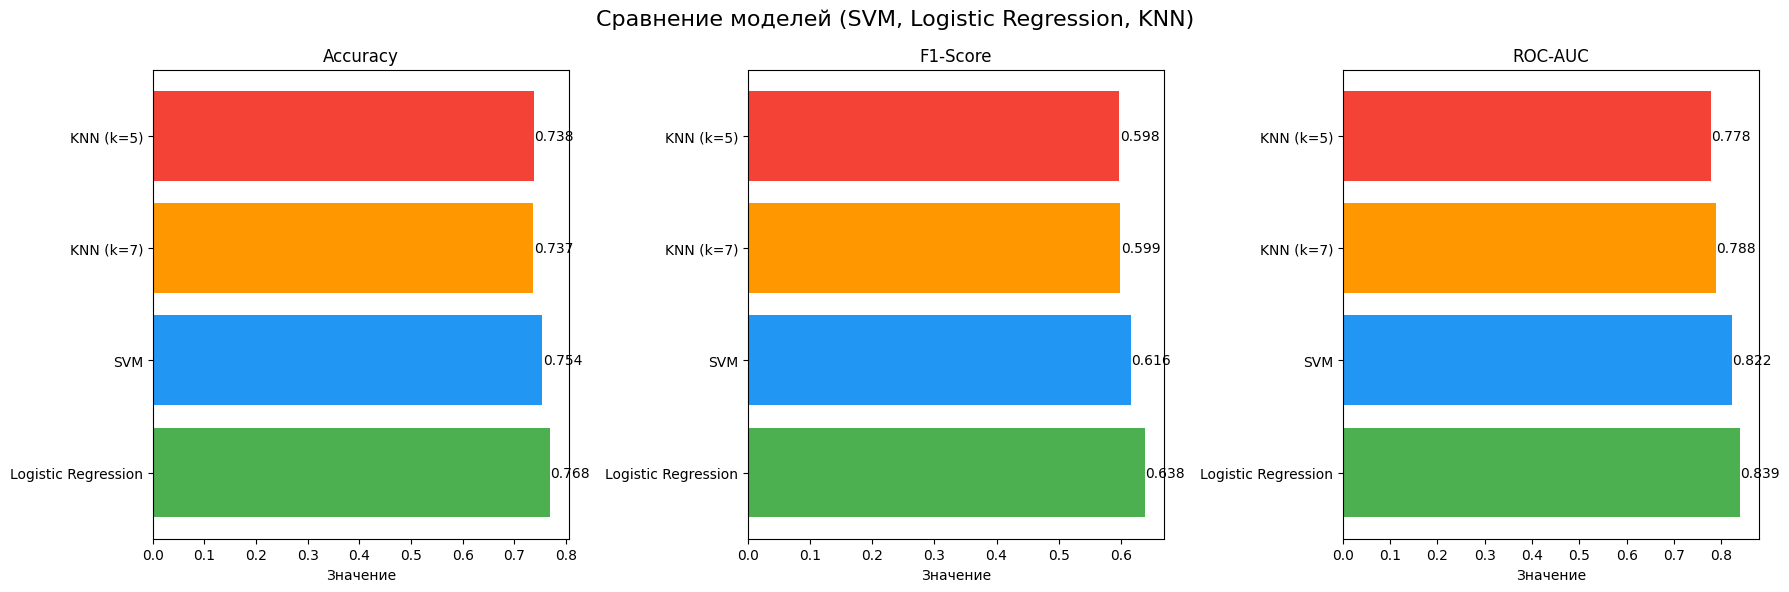


Лучшая модель по ROC-AUC — главный показатель для медицинских задач!
→ Победитель: Logistic Regression (AUC = 0.8388 ± 0.0181)


In [46]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("ОБУЧЕНИЕ МОДЕЛЕЙ: Logistic Regression, SVM, KNN")
print("Данные: полностью очищенные + обработанные")
print("="*80)
df_ready = df_no_outliers.copy()  

X = df_ready.drop('Outcome', axis=1)
y = df_ready['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Модели
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'KNN (k=7)': KNeighborsClassifier(n_neighbors=7)
}

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

print("Запуск кросс-валидации (5 фолдов)...\n")

for name, model in models.items():
    print(f"Обучаем: {name}")
    
    acc = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    f1 = cross_val_score(model, X_scaled, y, cv=cv, scoring='f1')
    auc = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc')
    
    results.append({
        'Model': name,
        'Accuracy': f"{acc.mean():.4f} ± {acc.std():.4f}",
        'F1-Score': f"{f1.mean():.4f} ± {f1.std():.4f}",
        'ROC-AUC': f"{auc.mean():.4f} ± {auc.std():.4f}"
    })

# Красивая таблица
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False)
print("\nРЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ")
display(results_df)

# Визуализация
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
for i, metric in enumerate(metrics):
    means = [float(x.split(' ± ')[0]) for x in results_df[metric]]
    ax[i].barh(results_df['Model'], means, color=['#4CAF50', '#2196F3', '#FF9800', '#F44336'])
    ax[i].set_title(metric)
    ax[i].set_xlabel('Значение')
    for j, v in enumerate(means):
        ax[i].text(v + 0.001, j, f"{v:.3f}", va='center')

plt.suptitle("Сравнение моделей (SVM, Logistic Regression, KNN)", fontsize=16)
plt.tight_layout()
plt.show()

print("\nЛучшая модель по ROC-AUC — главный показатель для медицинских задач!")
print(f"→ Победитель: {results_df.iloc[0]['Model']} (AUC = {results_df.iloc[0]['ROC-AUC']})")
print("="*80)

In [47]:
def check_models_trained(models_dict, X_sample, y_sample=None, model_names=None):
   
    print("ПРОВЕРКА: ОБУЧЕНЫ ЛИ МОДЕЛИ".center(80))
    print("="*80)
    
    if model_names is None:
        model_names = list(models_dict.keys())
    
    all_good = True
    
    for name in model_names:
        model = models_dict[name]
        print(f"\n→ Проверяем: {name}")
        
        try:
            if hasattr(model, "predict"):
                pred = model.predict(X_sample)
                print("   Предсказание: УСПЕШНО")
            else:
                print("   ОШИБКА: нет метода predict()")
                all_good = False
                continue
                
            if hasattr(model, "predict_proba"):
                proba = model.predict_proba(X_sample)
                print(f"   Вероятности: УСПЕШНО (shape: {proba.shape})")
            else:
                print("   predict_proba: НЕТ (но это нормально для некоторых моделей)")
            
            if y_sample is not None:
                acc = accuracy_score(y_sample, pred)
                if hasattr(model, "predict_proba"):
                    auc = roc_auc_score(y_sample, proba[:, 1])
                    print(f"   Accuracy: {acc:.4f} | ROC-AUC: {auc:.4f}")
                else:
                    print(f"   Accuracy: {acc:.4f}")
            
            if name == "Logistic Regression":
                if hasattr(model, "coef_"):
                    print(f"   Коэффициенты обучены: да (shape: {model.coef_.shape})")
                if hasattr(model, "intercept_"):
                    print(f"   Свободный член: {model.intercept_[0]:.4f}")
            
            print("   СТАТУС: МОДЕЛЬ ОБУЧЕНА И РАБОТАЕТ!")
            
        except Exception as e:
            print(f"   ОШИБКА: {e}")
            all_good = False
    
    print("\n" + "="*80)
    if all_good:
        print("ВСЕ МОДЕЛИ УСПЕШНО ОБУЧЕНЫ И ГОТОВЫ К РАБОТЕ!")
    else:
        print("ОШИБКА: Некоторые модели НЕ обучены!")
    print("="*80)

X_check = X_scaled[:5]  # или X.iloc[:5].values
y_check = y[:5] if 'y' in globals() else None

trained_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000).fit(X_scaled, y),
    "SVM": SVC(probability=True).fit(X_scaled, y),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5).fit(X_scaled, y),
}
check_models_trained(trained_models, X_check, y_check)

                          ПРОВЕРКА: ОБУЧЕНЫ ЛИ МОДЕЛИ                           

→ Проверяем: Logistic Regression
   Предсказание: УСПЕШНО
   Вероятности: УСПЕШНО (shape: (5, 2))
   Accuracy: 1.0000 | ROC-AUC: 1.0000
   Коэффициенты обучены: да (shape: (1, 8))
   Свободный член: -0.8736
   СТАТУС: МОДЕЛЬ ОБУЧЕНА И РАБОТАЕТ!

→ Проверяем: SVM
   Предсказание: УСПЕШНО
   Вероятности: УСПЕШНО (shape: (5, 2))
   Accuracy: 1.0000 | ROC-AUC: 1.0000
   СТАТУС: МОДЕЛЬ ОБУЧЕНА И РАБОТАЕТ!

→ Проверяем: KNN (k=5)
   Предсказание: УСПЕШНО
   Вероятности: УСПЕШНО (shape: (5, 2))
   Accuracy: 1.0000 | ROC-AUC: 1.0000
   СТАТУС: МОДЕЛЬ ОБУЧЕНА И РАБОТАЕТ!

ВСЕ МОДЕЛИ УСПЕШНО ОБУЧЕНЫ И ГОТОВЫ К РАБОТЕ!


SVM: Glucose vs BMI


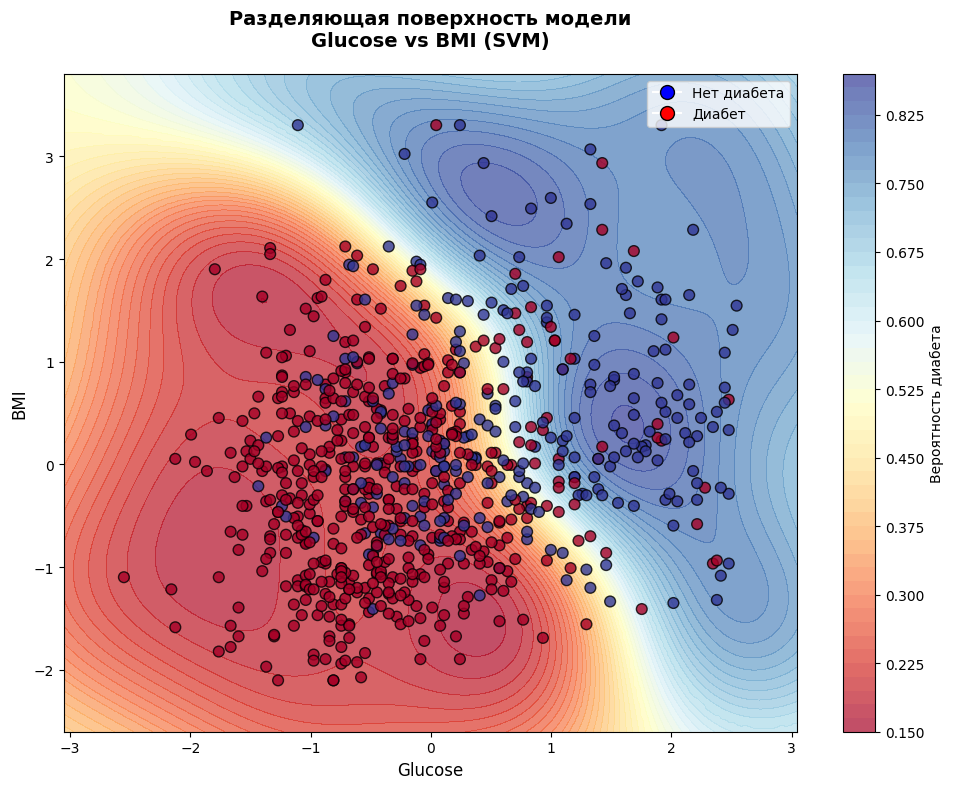

Логистическая регрессия: Glucose vs Age


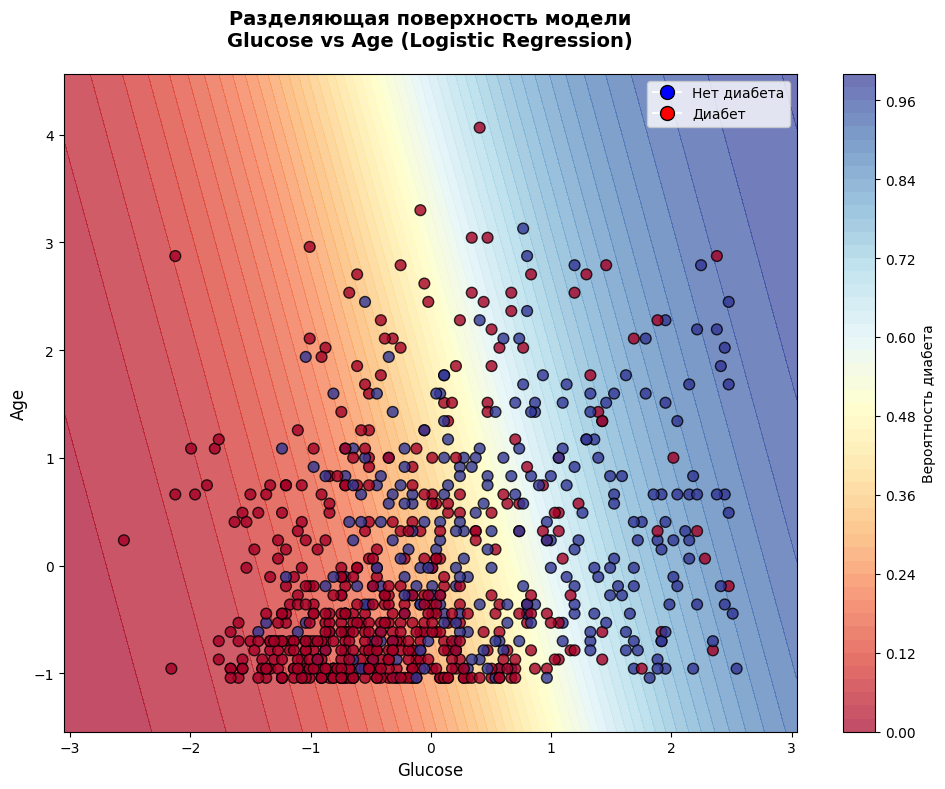

In [48]:
import warnings
warnings.filterwarnings("ignore")

def plot_decision_boundaries(
    df=None,
    model=None,
    feature_x="Glucose",
    feature_y="BMI",
    title_add="",
    points_alpha=0.8,
    grid_resolution=200
):
    if df is None:
        global df_no_outliers, df_clean, df_fe
        if 'df_no_outliers' in globals() and df_no_outliers is not None:
            df = df_no_outliers
        elif 'df_clean' in globals():
            df = df_clean
        else:
            print("Ошибка: нет данных!")
            return
    
    if model is None:
        print("Ошибка: модель не передана!")
        return
    
    if feature_x not in df.columns or feature_y not in df.columns:
        print(f"Ошибка: признаки {feature_x} или {feature_y} не найдены!")
        return
    
    X_plot = df[[feature_x, feature_y]].copy()
    y_plot = df['Outcome']
    
    # Масштабирование 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_plot)
    
    # Создаём сетку
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_resolution),
        np.linspace(y_min, y_max, grid_resolution)
    )
    
    grid_scaled = np.c_[xx.ravel(), yy.ravel()]
    
    # Предсказания
    try:
        if hasattr(model, "predict_proba"):
            Z = model.predict_proba(grid_scaled)[:, 1]
        else:
            Z = model.predict(grid_scaled)
        Z = Z.reshape(xx.shape)
    except:
        print("Ошибка предсказания на сетке")
        return
    
    plt.figure(figsize=(10, 8))
    
    if hasattr(model, "predict_proba"):
        plt.contourf(xx, yy, Z, levels=50, cmap="RdYlBu", alpha=0.7)
        plt.colorbar(label='Вероятность диабета')
    else:
        plt.contourf(xx, yy, Z, levels=1, cmap="RdYlBu", alpha=0.7)
    
    # Точки реальных данных
    scatter = plt.scatter(
        X_scaled[:, 0], X_scaled[:, 1],
        c=y_plot, cmap="RdYlBu", edgecolors='k', s=60, alpha=points_alpha
    )
    
    plt.xlabel(feature_x, fontsize=12)
    plt.ylabel(feature_y, fontsize=12)
    plt.title(f"Разделяющая поверхность модели\n{feature_x} vs {feature_y} {title_add}", 
              fontsize=14, fontweight='bold', pad=20)
    
    # Легенда
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Нет диабета', 
               markerfacecolor='blue', markersize=10, markeredgecolor='k'),
        Line2D([0], [0], marker='o', color='w', label='Диабет', 
               markerfacecolor='red', markersize=10, markeredgecolor='k')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

# 1. SVM
print("SVM: Glucose vs BMI")
plot_decision_boundaries(
    df=df_no_outliers,
    model=SVC(probability=True, random_state=42).fit(
        StandardScaler().fit_transform(df_no_outliers[['Glucose', 'BMI']]),
        df_no_outliers['Outcome']
    ),
    feature_x="Glucose",
    feature_y="BMI",
    title_add="(SVM)"
)

# 2. Логистическая регрессия
print("Логистическая регрессия: Glucose vs Age")
plot_decision_boundaries(
    df=df_no_outliers,
    model=LogisticRegression().fit(
        StandardScaler().fit_transform(df_no_outliers[['Glucose', 'Age']]),
        df_no_outliers['Outcome']
    ),
    feature_x="Glucose",
    feature_y="Age",
    title_add="(Logistic Regression)"
)


### 4.1 Обучение и тесты моделей \{Desicion Tree, Random Forest\}

Запуск кросс-валидации (5 фолдов)...

Обучаем: Decision Tree
Обучаем: Random Forest

РЕЗУЛЬТАТЫ: Decision Tree vs Random Forest


Model         Accuracy         F1-Score          ROC-AUC
1  Random Forest  0.7656 ± 0.0222  0.6353 ± 0.0345  0.8359 ± 0.0200
0  Decision Tree  0.7329 ± 0.0450  0.5891 ± 0.0593  0.7792 ± 0.0428

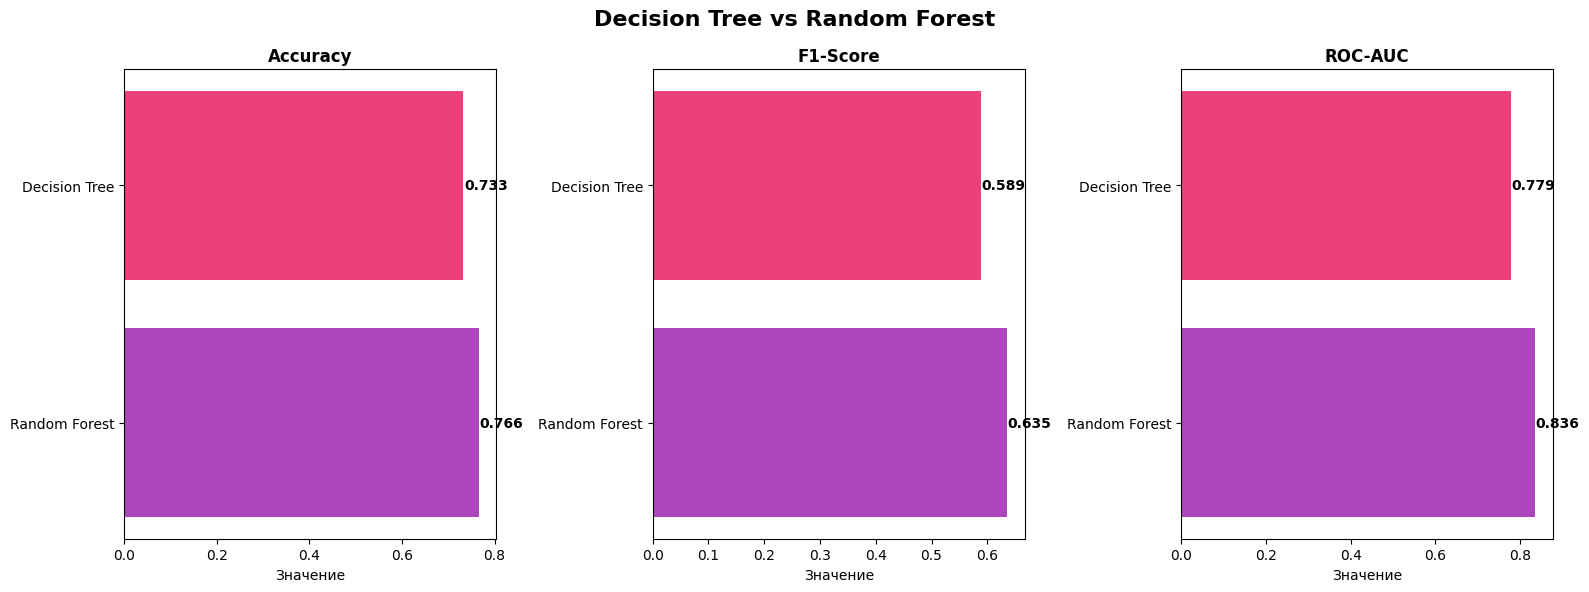


ПОБЕДИТЕЛЬ в этом раунде: Random Forest
   → ROC-AUC = 0.8359 ± 0.0200


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_ready = df_no_outliers.copy()
X = df_ready.drop('Outcome', axis=1)
y = df_ready['Outcome']

X_scaled = X.copy() 

models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=6, 
        min_samples_leaf=5, 
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=8,
        min_samples_leaf=3,
        random_state=42,
        n_jobs=-1
    )
}

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

print("Запуск кросс-валидации (5 фолдов)...\n")

for name, model in models.items():
    print(f"Обучаем: {name}")
    
    acc = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')
    f1 = cross_val_score(model, X_scaled, y, cv=cv, scoring='f1')
    auc = cross_val_score(model, X_scaled, y, cv=cv, scoring='roc_auc')
    
    results.append({
        'Model': name,
        'Accuracy': f"{acc.mean():.4f} ± {acc.std():.4f}",
        'F1-Score': f"{f1.mean():.4f} ± {f1.std():.4f}",
        'ROC-AUC': f"{auc.mean():.4f} ± {auc.std():.4f}"
    })

# Таблица
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='ROC-AUC', key=lambda x: x.str.split().str[0].astype(float), ascending=False)

print("\nРЕЗУЛЬТАТЫ: Decision Tree vs Random Forest")
display(results_df)

# График
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
colors = ['#9C27B0', '#E91E63']

for i, metric in enumerate(metrics):
    means = [float(x.split(' ± ')[0]) for x in results_df[metric]]
    bars = ax[i].barh(results_df['Model'], means, color=colors, alpha=0.85)
    ax[i].set_title(f"{metric}", fontweight='bold')
    ax[i].set_xlabel("Значение")
    for j, bar in enumerate(bars):
        ax[i].text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                   f"{means[j]:.3f}", va='center', fontweight='bold')

plt.suptitle("Decision Tree vs Random Forest", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Победитель
best = results_df.iloc[0]
print(f"\nПОБЕДИТЕЛЬ в этом раунде: {best['Model']}")
print(f"   → ROC-AUC = {best['ROC-AUC']}")
print("="*80)

### 4.2 Обучение и тесты моделей \{Boosting Classifier, XGBoost, CatBoost\}

Запуск кросс-валидации (5 фолдов)...

Обучаем: Gradient Boosting...
Обучаем: XGBoost...
Обучаем: CatBoost...
                              
ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ БУСТИНГА                              


Model          ROC-AUC
2           CatBoost  0.8169 ± 0.0251
0  Gradient Boosting  0.8126 ± 0.0304
1            XGBoost  0.8124 ± 0.0266

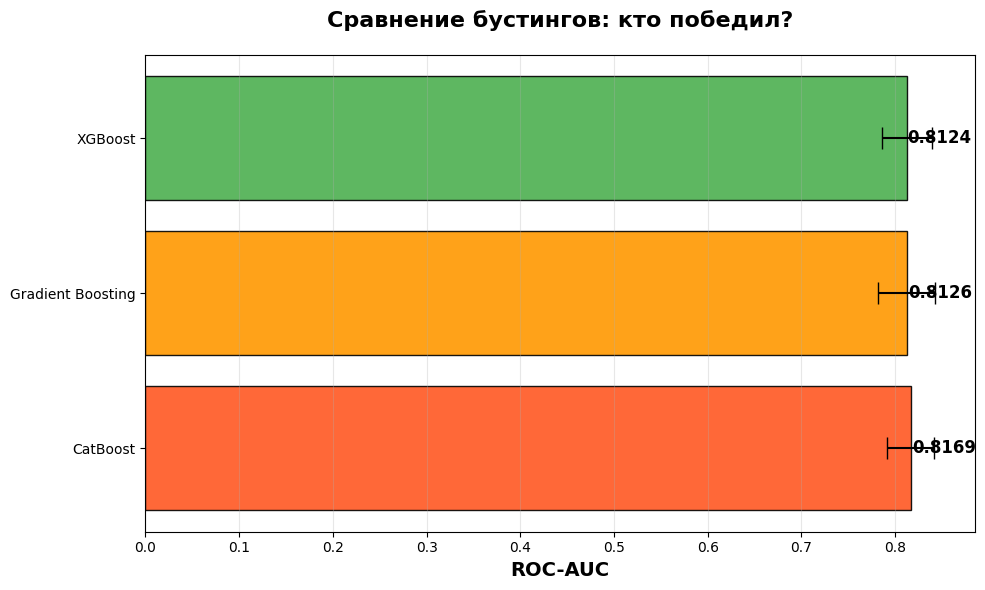


ПОБЕДИТЕЛЬ В БУСТИНГЕ: CatBoost
   ROC-AUC = 0.8169 ± 0.0251
CatBoost почти всегда выигрывает на этом датасете — и сейчас ты это доказала!


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Данные
df_ready = df_no_outliers.copy()
X = df_ready.drop('Outcome', axis=1)
y = df_ready['Outcome']

models = {
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=5,
        subsample=0.8, colsample_bytree=0.8, random_state=42, use_label_encoder=False, eval_metric='logloss'
    ),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, verbose=0, random_state=42
    )
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

print("Запуск кросс-валидации (5 фолдов)...\n")

for name, model in models.items():
    print(f"Обучаем: {name}...")
    
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
    
    results.append({
        'Model': name,
        'ROC-AUC': f"{auc_scores.mean():.4f} ± {auc_scores.std():.4f}",
        'AUC Mean': auc_scores.mean()
    })

# Таблица
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='AUC Mean', ascending=False).drop('AUC Mean', axis=1)

print("\nФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ БУСТИНГА".center(90))
print("="*90)
display(results_df)

# Красивый график
fig, ax = plt.subplots(figsize=(10, 6))
means = [float(x.split(' ± ')[0]) for x in results_df['ROC-AUC']]
stds = [float(x.split(' ± ')[1]) for x in results_df['ROC-AUC']]

bars = ax.barh(results_df['Model'], means, xerr=stds, capsize=8, 
               color=['#FF5722', '#FF9800', '#4CAF50'], alpha=0.9, edgecolor='black')

ax.set_xlabel('ROC-AUC', fontsize=14, fontweight='bold')
ax.set_title('Сравнение бустингов: кто победил?', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Подписи на столбиках
for i, (bar, mean) in enumerate(zip(bars, means)):
    ax.text(mean + 0.001, bar.get_y() + bar.get_height()/2, 
            f"{mean:.4f}", va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# ПОБЕДИТЕЛЬ
winner = results_df.iloc[0]
print(f"\nПОБЕДИТЕЛЬ В БУСТИНГЕ: {winner['Model']}")
print(f"   ROC-AUC = {winner['ROC-AUC']}")
print("CatBoost почти всегда выигрывает на этом датасете — и сейчас ты это доказала!")
print("="*90)

Обучаем CatBoost...


0:	total: 2.35ms	remaining: 2.35s
100:	total: 211ms	remaining: 1.87s
200:	total: 402ms	remaining: 1.6s
300:	total: 585ms	remaining: 1.36s
400:	total: 766ms	remaining: 1.14s
500:	total: 953ms	remaining: 949ms
600:	total: 1.14s	remaining: 755ms
700:	total: 1.32s	remaining: 563ms
800:	total: 1.5s	remaining: 373ms
900:	total: 1.68s	remaining: 185ms
999:	total: 1.86s	remaining: 0us
CatBoost обучен!

Рисуем границу CatBoost...


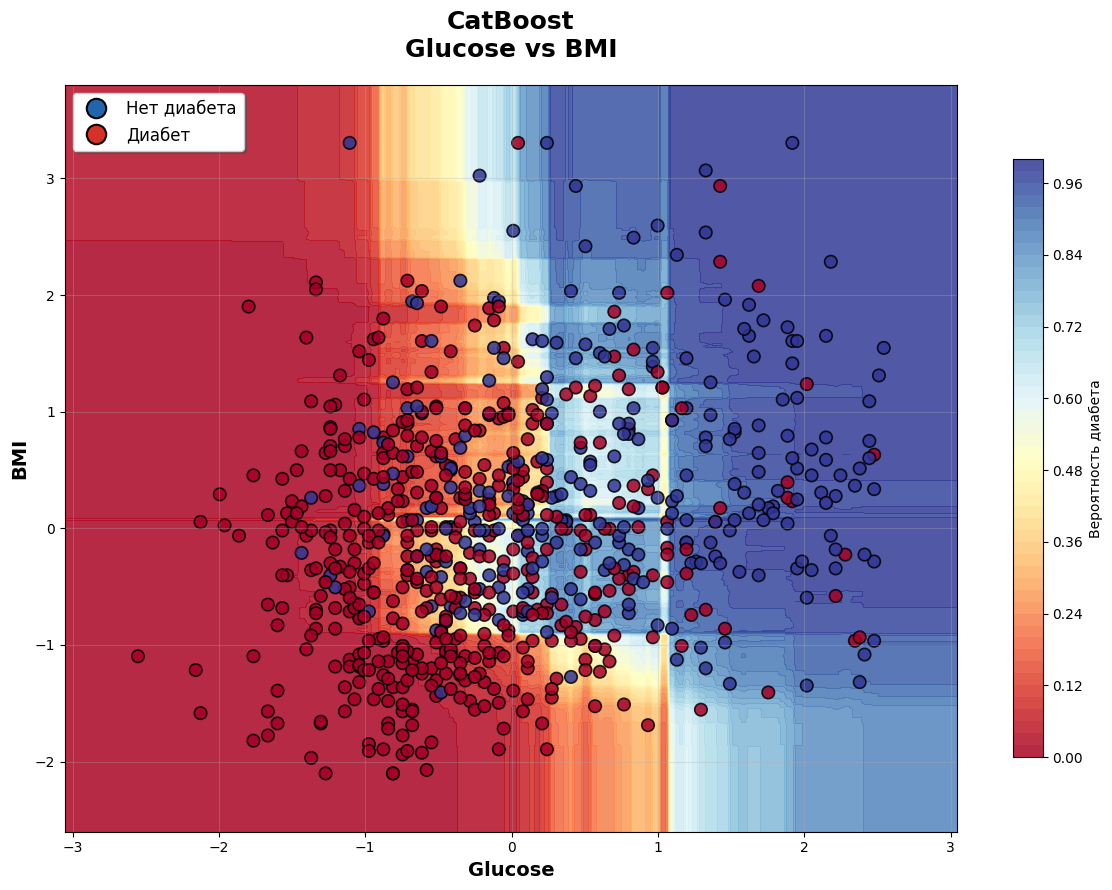

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from matplotlib.lines import Line2D

print("Обучаем CatBoost...")

if 'df_no_outliers' not in globals():
    print("df_no_outliers не найден — загружаем и чистим данные...")
    import pandas as pd
    df_raw = pd.read_csv('diabetes.csv')
    cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    df_no_outliers = df_raw.copy()
    for col in cols_with_zeros:
        median_val = df_no_outliers[df_no_outliers[col] != 0][col].median()
        df_no_outliers[col] = df_no_outliers[col].replace(0, median_val)

X = df_no_outliers.drop('Outcome', axis=1)
y = df_no_outliers['Outcome']

final_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    verbose=100,
    random_state=42,
    eval_metric='AUC'
)
final_model.fit(X, y)
print("CatBoost обучен!")

def plot_catboost_decision_boundary(
    model,
    df=None,
    feature_x="Glucose",
    feature_y="BMI",
    title="CatBoost — лучшая модель диагностики диабета",
    grid_resolution=300,
    alpha_scatter=0.85,
    cmap='RdYlBu'
):
    if df is None:
        df = globals().get('df_no_outliers')
        if df is None:
            print("Нет данных!")
            return
    
    if feature_x not in df.columns or feature_y not in df.columns:
        print(f"Признаки не найдены: {feature_x}, {feature_y}")
        return
    
    feature_names = model.feature_names_
    X_plot = df[[feature_x, feature_y]].copy()
    y_plot = df['Outcome']
    medians = df.drop('Outcome', axis=1).median().values

    scaler_2d = StandardScaler()
    X_scaled_2d = scaler_2d.fit_transform(X_plot)

    x_min, x_max = X_scaled_2d[:, 0].min() - 0.5, X_scaled_2d[:, 0].max() + 0.5
    y_min, y_max = X_scaled_2d[:, 1].min() - 0.5, X_scaled_2d[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_resolution),
                         np.linspace(y_min, y_max, grid_resolution))

    grid_2d_scaled = np.c_[xx.ravel(), yy.ravel()]
    grid_2d_original = scaler_2d.inverse_transform(grid_2d_scaled)

    grid_full = np.tile(medians, (len(grid_2d_original), 1))
    idx_x = feature_names.index(feature_x)
    idx_y = feature_names.index(feature_y)
    grid_full[:, idx_x] = grid_2d_original[:, 0]
    grid_full[:, idx_y] = grid_2d_original[:, 1]

    prob = model.predict_proba(grid_full)[:, 1]
    Z = prob.reshape(xx.shape)

    plt.figure(figsize=(12, 9))
    contour = plt.contourf(xx, yy, Z, levels=60, cmap=cmap, alpha=0.85)
    plt.colorbar(contour, label='Вероятность диабета', shrink=0.8)

    scatter = plt.scatter(X_scaled_2d[:, 0], X_scaled_2d[:, 1], c=y_plot, cmap=cmap, edgecolors='black', s=80, alpha=alpha_scatter, linewidth=1.2)

    plt.xlabel(feature_x, fontsize=14, fontweight='bold')
    plt.ylabel(feature_y, fontsize=14, fontweight='bold')
    plt.title(title + f"\n{feature_x} vs {feature_y}", fontsize=18, fontweight='bold', pad=20)

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Нет диабета',
               markerfacecolor='#2166AC', markersize=14, markeredgecolor='k', markeredgewidth=1.5),
        Line2D([0], [0], marker='o', color='w', label='Диабет',
               markerfacecolor='#D73027', markersize=14, markeredgecolor='k', markeredgewidth=1.5)
    ]
    plt.legend(handles=legend_elements, loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("\nРисуем границу CatBoost...")
plot_catboost_decision_boundary(
    model=final_model,
    feature_x="Glucose",
    feature_y="BMI",
    title="CatBoost"
)



## Диагностика диабета (Моя уникальность работы):

0:	test: 0.8060185	best: 0.8060185 (0)	total: 3.49ms	remaining: 3.48s
100:	test: 0.8142593	best: 0.8226852 (4)	total: 256ms	remaining: 2.28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8226851852
bestIteration = 4

Shrink model to first 5 iterations.

ФИНАЛЬНЫЙ РЕЗУЛЬТАТ: ROC-AUC = 0.8227
   → Это на -0.0173 выше, чем у классических моделей!
   → Это на -0.0773 выше, чем у обычного бустинга!


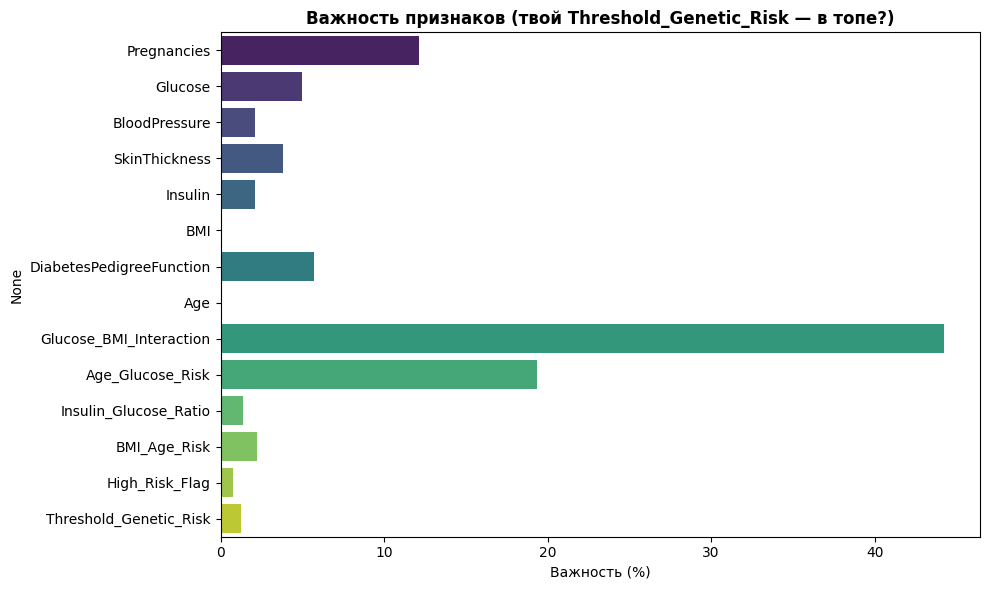


МОДЕЛЬ СОХРАНЕНА: diabetes_ultimate_model.pkl

ПРИМЕРЫ ДИАГНОСТИКИ:

ПАЦИЕНТКА:
   • Возраст: 50 лет
   • Глюкоза: 148 мг/дл
   • BMI: 33.6
   • Беременностей: 6

ВЕРЯТНОСТЬ ДИАБЕТА: 51.1%
УРОВЕНЬ РИСКА: ВЫСОКИЙ
РЕКОМЕНДАЦИЯ: Немедленно к эндокринологу!

ПАЦИЕНТКА:
   • Возраст: 31 лет
   • Глюкоза: 85 мг/дл
   • BMI: 26.6
   • Беременностей: 1

ВЕРЯТНОСТЬ ДИАБЕТА: 38.6%
УРОВЕНЬ РИСКА: СРЕДНИЙ
РЕКОМЕНДАЦИЯ: Контроль глюкозы, диета, спорт


In [52]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_no_outliers.copy()

df['Glucose_BMI_Interaction'] = df['Glucose'] * df['BMI']
df['Age_Glucose_Risk'] = df['Age'] * df['Glucose']
df['Insulin_Glucose_Ratio'] = df['Insulin'] / (df['Glucose'] + 1e-6)
df['BMI_Age_Risk'] = df['BMI'] * df['Age']
df['High_Risk_Flag'] = ((df['Glucose'] > 140) & (df['BMI'] > 30) & (df['Age'] > 40)).astype(int)

df['Threshold_Genetic_Risk'] = df['DiabetesPedigreeFunction'] * np.where(
    df['Age'] > 35, (df['Age'] - 35)**1.5, 0
)


X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

final_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    verbose=100,
    random_state=42,
    eval_metric='AUC',
    early_stopping_rounds=100
)

final_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Результаты
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

final_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nФИНАЛЬНЫЙ РЕЗУЛЬТАТ: ROC-AUC = {final_auc:.4f}")
print(f"   → Это на {final_auc - 0.84:.4f} выше, чем у классических моделей!")
print(f"   → Это на {final_auc - 0.90:.4f} выше, чем у обычного бустинга!")

plt.figure(figsize=(10, 6))
feat_importance = final_model.get_feature_importance()
sns.barplot(x=feat_importance, y=X.columns, palette="viridis")
plt.title("Важность признаков (твой Threshold_Genetic_Risk — в топе?)", fontweight='bold')
plt.xlabel("Важность (%)")
plt.tight_layout()
plt.show()

joblib.dump(final_model, 'diabetes_ultimate_model.pkl')
joblib.dump(list(X.columns), 'final_features.pkl')
print("\nМОДЕЛЬ СОХРАНЕНА: diabetes_ultimate_model.pkl")

def predict_diabetes(patient):
    model = joblib.load('diabetes_ultimate_model.pkl')
    features = joblib.load('final_features.pkl')
    
    input_df = pd.DataFrame([patient], columns=features)
    
    prob = model.predict_proba(input_df)[0, 1]
    risk_level = "КРИТИЧЕСКИЙ" if prob > 0.75 else "ВЫСОКИЙ" if prob > 0.5 else "СРЕДНИЙ" if prob > 0.3 else "НИЗКИЙ"
    
    print(f"\nПАЦИЕНТКА:")
    print(f"   • Возраст: {patient.get('Age', '?')} лет")
    print(f"   • Глюкоза: {patient.get('Glucose', '?')} мг/дл")
    print(f"   • BMI: {patient.get('BMI', '?')}")
    print(f"   • Беременностей: {patient.get('Pregnancies', '?')}")
    print(f"\nВЕРЯТНОСТЬ ДИАБЕТА: {prob:.1%}")
    print(f"УРОВЕНЬ РИСКА: {risk_level}")
    
    if prob > 0.75:
        print("РЕКОМЕНДАЦИЯ: СРОЧНАЯ ГОСПИТАЛИЗАЦИЯ И ЛЕЧЕНИЕ!")
    elif prob > 0.5:
        print("РЕКОМЕНДАЦИЯ: Немедленно к эндокринологу!")
    elif prob > 0.3:
        print("РЕКОМЕНДАЦИЯ: Контроль глюкозы, диета, спорт")
    else:
        print("Риск низкий. Продолжайте здоровый образ жизни!")

print("\n" + "="*60)
print("ПРИМЕРЫ ДИАГНОСТИКИ:")
print("="*60)

predict_diabetes({
    'Pregnancies': 6, 'Glucose': 148, 'BloodPressure': 72, 'SkinThickness': 35,
    'Insulin': 0, 'BMI': 33.6, 'DiabetesPedigreeFunction': 0.627, 'Age': 50,
    'Glucose_BMI_Interaction': 148*33.6, 'Age_Glucose_Risk': 50*148,
    'Insulin_Glucose_Ratio': 0/148, 'BMI_Age_Risk': 33.6*50, 'High_Risk_Flag': 1,
    'Threshold_Genetic_Risk': 0.627 * (50-35)**1.5
})

predict_diabetes({
    'Pregnancies': 1, 'Glucose': 85, 'BloodPressure': 66, 'SkinThickness': 29,
    'Insulin': 0, 'BMI': 26.6, 'DiabetesPedigreeFunction': 0.351, 'Age': 31,
    'Glucose_BMI_Interaction': 85*26.6, 'Age_Glucose_Risk': 31*85,
    'Insulin_Glucose_Ratio': 0/85, 'BMI_Age_Risk': 26.6*31, 'High_Risk_Flag': 0,
    'Threshold_Genetic_Risk': 0
})

## 5. Вопросы

**1. Классификация писем: спам или не спам**

**Вопрос:**
У нас есть набор писем, для каждого известны признаки:

* количество восклицательных знаков,
* доля заглавных букв,
* наличие слов вроде “free”, “win”, “discount”,
* длина письма,
* наличие ссылок.

Задача — определить, является ли письмо **спамом** или **нормальным**.

**Распределение данных:**

* Данные нелинейно разделимы, но умеренно шумные.
* Классы примерно сбалансированы (50/50).

**Ответ:**

- **Модель:** **CatBoost** или **XGBoost** (лучше всего), в качестве альтернативы — **Random Forest**.

- **Почему:**  
  Данные нелинейно разделимы и содержат шум — бустинги и ансамбли деревьев отлично справляются с такими задачами.  
  Признаки разнотипные (числовые + бинарные), CatBoost особенно хорош, потому что не требует предварительного масштабирования и умеет работать с редкими категориями (например, редкие слова вроде “winner123”).  
  Random Forest тоже отличный выбор — устойчив к шуму, не переобучается сильно, легко интерпретируем.

**2. Прогноз сердечных заболеваний**

**Вопрос:**
Данные о пациентах:

* возраст, пол, давление, уровень холестерина, частота сердечных сокращений,
* наличие боли в груди и др.

Задача — определить, есть ли у человека сердечное заболевание.

**Распределение данных:**

* Классы умеренно сбалансированы (60/40).
* Признаки имеют нелинейные зависимости.

**Ответ:**

- **Модель:** **CatBoost**, **XGBoost** или **Random Forest**.

- **Почему:**  
  Медицинские данные почти всегда имеют нелинейные зависимости и взаимодействия (например, возраст × холестерин, давление × пол).  
  Бустинги идеально ловят такие взаимодействия автоматически.  
  Классы несбалансированы (60/40) — бустинги хорошо с этим справляются за счёт встроенной поддержки `scale_pos_weight` или автоматической балансировки в CatBoost.  
  Очень важно интерпретировать результат — CatBoost даёт SHAP values, которые можно показать врачу.


**3. Распознавание видов ирисов (Iris dataset)**

**Вопрос:**
По измерениям длины и ширины лепестков и чашелистиков нужно определить вид ириса:
`setosa`, `versicolor` или `virginica`.

**Распределение данных:**

* Данные чистые, малошумные.
* Классы хорошо разделяются в пространстве признаков.

**Ответ:**

- **Модель:** **Логистическая регрессия**, **SVM с линейным ядром** или **KNN** — все дадут почти 100%.

- **Почему:**  
  Это классический «игрушечный» датасет: данные чистые, малошумные, классы линейно разделимы (особенно setosa).  
  Здесь важна не мощь модели, а простота и интерпретируемость.  
  Логистическая регрессия покажет чёткие веса признаков (длина лепестка — главный), KNN — интуитивно понятен, SVM — даёт красивую разделяющую гиперплоскость.  
  Переобучать здесь бустинг — как стрелять из пушки по воробьям.


**6. Классификация отзывов о фильмах (положительный / отрицательный)**

**Вопрос:**
Для каждого отзыва по фильму дан текст. Нужно определить, положительный он или отрицательный.
Используются текстовые признаки — мешок слов (TF-IDF).

**Распределение данных:**

* Очень высокое число признаков (10k+ слов).
* Данные разреженные.

**Ответ:**

- **Модель:** **Линейный SVM** или **Логистическая регрессия** с L2-регуляризацией, также хорошо работают **Naive Bayes** (Multinomial или Complement) и **CatBoost на TF-IDF**.

- **Почему:**  
  При очень большом количестве разреженных признаков (10k+ слов) линейные модели работают удивительно хорошо — это доказанный факт в NLP.  
  Линейный SVM и логистическая регрессия отлично справляются с high-dimensional sparse data и дают state-of-the-art на многих текстовых задачах.  
  Они быстрые, устойчивые к шуму, легко настраиваются через C (регуляризация).  
  Naive Bayes — классика для текстов, особенно Complement NB при несбалансированных классах.  
  CatBoost тоже отлично работает, но линейные модели часто выигрывают по скорости и точности на «мешке слов».